In [1]:
# Importing Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stat
from collections import Counter
import dataprep
import statsmodels.api as smf
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE,  ADASYN
from imblearn.combine import SMOTETomek, SMOTEENN
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from dataprep.eda import plot, plot_correlation, plot_missing, create_report
from sklearn.model_selection import KFold , GridSearchCV, train_test_split, StratifiedKFold, RandomizedSearchCV
from sklearn.metrics import confusion_matrix as cm, accuracy_score as ac, classification_report as report,\
roc_curve, roc_auc_score , recall_score , precision_score, f1_score
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing Training Dataset
salary_train = pd.read_csv('SalaryData_train.csv')
salary_train

age          workclass    education  educationno        maritalstatus  \
0       39          State-gov    Bachelors           13        Never-married   
1       50   Self-emp-not-inc    Bachelors           13   Married-civ-spouse   
2       38            Private      HS-grad            9             Divorced   
3       53            Private         11th            7   Married-civ-spouse   
4       28            Private    Bachelors           13   Married-civ-spouse   
...    ...                ...          ...          ...                  ...   
30156   27            Private   Assoc-acdm           12   Married-civ-spouse   
30157   40            Private      HS-grad            9   Married-civ-spouse   
30158   58            Private      HS-grad            9              Widowed   
30159   22            Private      HS-grad            9        Never-married   
30160   52       Self-emp-inc      HS-grad            9   Married-civ-spouse   

               occupation    relationship    race      sex  capitalgain  \
0            Adm-clerical   Not-in-family   White     Male         2174   
1         Exec-managerial         Husband   White     Male            0   
2       Handlers-cleaners   Not-in-family   White     Male            0   
3       Handlers-cleaners         Husband   Black     Male            0   
4          Prof-specialty            Wife   Black   Female            0   
...                   ...             ...     ...      ...          ...   
30156        Tech-support            Wife   White   Female            0   
30157   Machine-op-inspct         Husband   White     Male            0   
30158        Adm-clerical       Unmarried   White   Female            0   
30159        Adm-clerical       Own-child   White     Male            0   
30160     Exec-managerial            Wife   White   Female        15024   

       capitalloss  hoursperweek          native  Salary  
0                0            40   United-States   <=50K  
1                0            13   United-States   <=50K  
2                0            40   United-States   <=50K  
3                0            40   United-States   <=50K  
4                0            40            Cuba   <=50K  
...            ...           ...             ...     ...  
30156            0            38   United-States   <=50K  
30157            0            40   United-States    >50K  
30158            0            40   United-States   <=50K  
30159            0            20   United-States   <=50K  
30160            0            40   United-States    >50K  

[30161 rows x 14 columns]

In [3]:
# Importing Testing Dataset
salary_test = pd.read_csv('SalaryData_test.csv')
salary_test

age      workclass      education  educationno        maritalstatus  \
0       25        Private           11th            7        Never-married   
1       38        Private        HS-grad            9   Married-civ-spouse   
2       28      Local-gov     Assoc-acdm           12   Married-civ-spouse   
3       44        Private   Some-college           10   Married-civ-spouse   
4       34        Private           10th            6        Never-married   
...    ...            ...            ...          ...                  ...   
15055   33        Private      Bachelors           13        Never-married   
15056   39        Private      Bachelors           13             Divorced   
15057   38        Private      Bachelors           13   Married-civ-spouse   
15058   44        Private      Bachelors           13             Divorced   
15059   35   Self-emp-inc      Bachelors           13   Married-civ-spouse   

               occupation    relationship                 race      sex  \
0       Machine-op-inspct       Own-child                Black     Male   
1         Farming-fishing         Husband                White     Male   
2         Protective-serv         Husband                White     Male   
3       Machine-op-inspct         Husband                Black     Male   
4           Other-service   Not-in-family                White     Male   
...                   ...             ...                  ...      ...   
15055      Prof-specialty       Own-child                White     Male   
15056      Prof-specialty   Not-in-family                White   Female   
15057      Prof-specialty         Husband                White     Male   
15058        Adm-clerical       Own-child   Asian-Pac-Islander     Male   
15059     Exec-managerial         Husband                White     Male   

       capitalgain  capitalloss  hoursperweek          native  Salary  
0                0            0            40   United-States   <=50K  
1                0            0            50   United-States   <=50K  
2                0            0            40   United-States    >50K  
3             7688            0            40   United-States    >50K  
4                0            0            30   United-States   <=50K  
...            ...          ...           ...             ...     ...  
15055            0            0            40   United-States   <=50K  
15056            0            0            36   United-States   <=50K  
15057            0            0            50   United-States   <=50K  
15058         5455            0            40   United-States   <=50K  
15059            0            0            60   United-States    >50K  

[15060 rows x 14 columns]

In [4]:
# Merging Train and Test Data
raw_data = salary_train.append(salary_test)
raw_data.reset_index(inplace=True)
raw_data

index  age          workclass   education  educationno  \
0          0   39          State-gov   Bachelors           13   
1          1   50   Self-emp-not-inc   Bachelors           13   
2          2   38            Private     HS-grad            9   
3          3   53            Private        11th            7   
4          4   28            Private   Bachelors           13   
...      ...  ...                ...         ...          ...   
45216  15055   33            Private   Bachelors           13   
45217  15056   39            Private   Bachelors           13   
45218  15057   38            Private   Bachelors           13   
45219  15058   44            Private   Bachelors           13   
45220  15059   35       Self-emp-inc   Bachelors           13   

             maritalstatus          occupation    relationship  \
0            Never-married        Adm-clerical   Not-in-family   
1       Married-civ-spouse     Exec-managerial         Husband   
2                 Divorced   Handlers-cleaners   Not-in-family   
3       Married-civ-spouse   Handlers-cleaners         Husband   
4       Married-civ-spouse      Prof-specialty            Wife   
...                    ...                 ...             ...   
45216        Never-married      Prof-specialty       Own-child   
45217             Divorced      Prof-specialty   Not-in-family   
45218   Married-civ-spouse      Prof-specialty         Husband   
45219             Divorced        Adm-clerical       Own-child   
45220   Married-civ-spouse     Exec-managerial         Husband   

                      race      sex  capitalgain  capitalloss  hoursperweek  \
0                    White     Male         2174            0            40   
1                    White     Male            0            0            13   
2                    White     Male            0            0            40   
3                    Black     Male            0            0            40   
4                    Black   Female            0            0            40   
...                    ...      ...          ...          ...           ...   
45216                White     Male            0            0            40   
45217                White   Female            0            0            36   
45218                White     Male            0            0            50   
45219   Asian-Pac-Islander     Male         5455            0            40   
45220                White     Male            0            0            60   

               native  Salary  
0       United-States   <=50K  
1       United-States   <=50K  
2       United-States   <=50K  
3       United-States   <=50K  
4                Cuba   <=50K  
...               ...     ...  
45216   United-States   <=50K  
45217   United-States   <=50K  
45218   United-States   <=50K  
45219   United-States   <=50K  
45220   United-States    >50K  

[45221 rows x 15 columns]

# Data Exploration 

### A Binary Classification Task as our classes to predict is 'Yes' or 'No' a Binomial Distribution

In [5]:
# print shape of dataset with rows and columns
print(raw_data.shape)
# print top 5 records
raw_data.head()

(45221, 15)


index  age          workclass   education  educationno  \
0      0   39          State-gov   Bachelors           13   
1      1   50   Self-emp-not-inc   Bachelors           13   
2      2   38            Private     HS-grad            9   
3      3   53            Private        11th            7   
4      4   28            Private   Bachelors           13   

         maritalstatus          occupation    relationship    race      sex  \
0        Never-married        Adm-clerical   Not-in-family   White     Male   
1   Married-civ-spouse     Exec-managerial         Husband   White     Male   
2             Divorced   Handlers-cleaners   Not-in-family   White     Male   
3   Married-civ-spouse   Handlers-cleaners         Husband   Black     Male   
4   Married-civ-spouse      Prof-specialty            Wife   Black   Female   

   capitalgain  capitalloss  hoursperweek          native  Salary  
0         2174            0            40   United-States   <=50K  
1            0            0            13   United-States   <=50K  
2            0            0            40   United-States   <=50K  
3            0            0            40   United-States   <=50K  
4            0            0            40            Cuba   <=50K

# Descriptive Statistics

In [6]:
raw_data.describe()

index           age   educationno   capitalgain   capitalloss  \
count  45221.000000  45221.000000  45221.000000  45221.000000  45221.000000   
mean   12565.448575     38.548086     10.118463   1101.454700     88.548617   
std     8337.871072     13.217981      2.552909   7506.511295    404.838249   
min        0.000000     17.000000      1.000000      0.000000      0.000000   
25%     5652.000000     28.000000      9.000000      0.000000      0.000000   
50%    11305.000000     37.000000     10.000000      0.000000      0.000000   
75%    18855.000000     47.000000     13.000000      0.000000      0.000000   
max    30160.000000     90.000000     16.000000  99999.000000   4356.000000   

       hoursperweek  
count  45221.000000  
mean      40.938038  
std       12.007640  
min        1.000000  
25%       40.000000  
50%       40.000000  
75%       45.000000  
max       99.000000

In [7]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45221 entries, 0 to 45220
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   index          45221 non-null  int64 
 1   age            45221 non-null  int64 
 2   workclass      45221 non-null  object
 3   education      45221 non-null  object
 4   educationno    45221 non-null  int64 
 5   maritalstatus  45221 non-null  object
 6   occupation     45221 non-null  object
 7   relationship   45221 non-null  object
 8   race           45221 non-null  object
 9   sex            45221 non-null  object
 10  capitalgain    45221 non-null  int64 
 11  capitalloss    45221 non-null  int64 
 12  hoursperweek   45221 non-null  int64 
 13  native         45221 non-null  object
 14  Salary         45221 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.2+ MB


### All the columns data types are correctly identified

# Missing Values 

In [8]:
raw_data.isnull().sum()

index            0
age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

### So we see that there are no missing values.

# Duplicated Values

In [9]:
raw_data[raw_data.duplicated()]

Empty DataFrame
Columns: [index, age, workclass, education, educationno, maritalstatus, occupation, relationship, race, sex, capitalgain, capitalloss, hoursperweek, native, Salary]
Index: []

In [10]:
raw_data[raw_data.duplicated()].shape

(0, 15)

# Numerical Variables

In [11]:
# List of Numerical Variables
numerical_features=[feature for feature in raw_data.columns if raw_data[feature].dtypes != 'O']

print('Number of numerical variables:', len(numerical_features))

# Visualize the numerical variables
raw_data[numerical_features].head()

Number of numerical variables: 6


index  age  educationno  capitalgain  capitalloss  hoursperweek
0      0   39           13         2174            0            40
1      1   50           13            0            0            13
2      2   38            9            0            0            40
3      3   53            7            0            0            40
4      4   28           13            0            0            40

In [12]:
discrete_feature=[feature for feature in numerical_features if len(raw_data[feature].unique())<25]
print('Discrete Variables Count: {}'.format(len(discrete_feature)))

Discrete Variables Count: 1


# Continuous Variable

In [13]:
continuous_feature=[feature for feature in numerical_features if feature not in discrete_feature]
print('Continuous Feature Count {}'.format(len(continuous_feature)))

Continuous Feature Count 5


# Categorical Variables

In [14]:
# find categorical variables

categorical = [var for var in raw_data.columns if raw_data[var].dtype=='O']

print('There are {} categorical variables\n'.format(len(categorical)))

print('The categorical variables are :\n\n', categorical)

There are 9 categorical variables

The categorical variables are :

 ['workclass', 'education', 'maritalstatus', 'occupation', 'relationship', 'race', 'sex', 'native', 'Salary']


# Frequency counts of categorical variables




In [15]:
# view frequency counts of values in categorical variables

for var in categorical: 
    
    print(raw_data[var].value_counts())

 Private             33306
 Self-emp-not-inc     3796
 Local-gov            3100
 State-gov            1946
 Self-emp-inc         1646
 Federal-gov          1406
 Without-pay            21
Name: workclass, dtype: int64
 HS-grad         14783
 Some-college     9898
 Bachelors        7570
 Masters          2514
 Assoc-voc        1959
 11th             1619
 Assoc-acdm       1507
 10th             1223
 7th-8th           823
 Prof-school       785
 9th               676
 12th              577
 Doctorate         544
 5th-6th           449
 1st-4th           222
 Preschool          72
Name: education, dtype: int64
 Married-civ-spouse       21055
 Never-married            14597
 Divorced                  6297
 Separated                 1411
 Widowed                   1277
 Married-spouse-absent      552
 Married-AF-spouse           32
Name: maritalstatus, dtype: int64
 Craft-repair         6020
 Prof-specialty       6008
 Exec-managerial      5984
 Adm-clerical         5540
 Sales           

In [16]:
# view frequency distribution of categorical variables

for var in categorical: 
    
    print(raw_data[var].value_counts()/np.round(len(raw_data)))

 Private             0.736516
 Self-emp-not-inc    0.083943
 Local-gov           0.068552
 State-gov           0.043033
 Self-emp-inc        0.036399
 Federal-gov         0.031092
 Without-pay         0.000464
Name: workclass, dtype: float64
 HS-grad         0.326906
 Some-college    0.218881
 Bachelors       0.167400
 Masters         0.055594
 Assoc-voc       0.043321
 11th            0.035802
 Assoc-acdm      0.033325
 10th            0.027045
 7th-8th         0.018200
 Prof-school     0.017359
 9th             0.014949
 12th            0.012760
 Doctorate       0.012030
 5th-6th         0.009929
 1st-4th         0.004909
 Preschool       0.001592
Name: education, dtype: float64
 Married-civ-spouse       0.465602
 Never-married            0.322793
 Divorced                 0.139249
 Separated                0.031202
 Widowed                  0.028239
 Married-spouse-absent    0.012207
 Married-AF-spouse        0.000708
Name: maritalstatus, dtype: float64
 Craft-repair         0.13312

In [17]:
# check for cardinality in categorical variables

for var in categorical:
    
    print(var, ' contains ', len(raw_data[var].unique()), ' labels')

workclass  contains  7  labels
education  contains  16  labels
maritalstatus  contains  7  labels
occupation  contains  14  labels
relationship  contains  6  labels
race  contains  5  labels
sex  contains  2  labels
native  contains  40  labels
Salary  contains  2  labels


In [18]:
raw_data.corr()

index       age  educationno  capitalgain  capitalloss  \
index         1.000000 -0.003723     0.000634    -0.001517    -0.002175   
age          -0.003723  1.000000     0.037623     0.079682     0.059426   
educationno   0.000634  0.037623     1.000000     0.126907     0.081741   
capitalgain  -0.001517  0.079682     0.126907     1.000000    -0.032095   
capitalloss  -0.002175  0.059426     0.081741    -0.032095     1.000000   
hoursperweek -0.002257  0.101992     0.146206     0.083880     0.054220   

              hoursperweek  
index            -0.002257  
age               0.101992  
educationno       0.146206  
capitalgain       0.083880  
capitalloss       0.054220  
hoursperweek      1.000000

# Exploratory Data Analysis

(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5]),
 [Text(0.5, 0, 'index'),
  Text(1.5, 0, 'age'),
  Text(2.5, 0, 'educationno'),
  Text(3.5, 0, 'capitalgain'),
  Text(4.5, 0, 'capitalloss'),
  Text(5.5, 0, 'hoursperweek')])

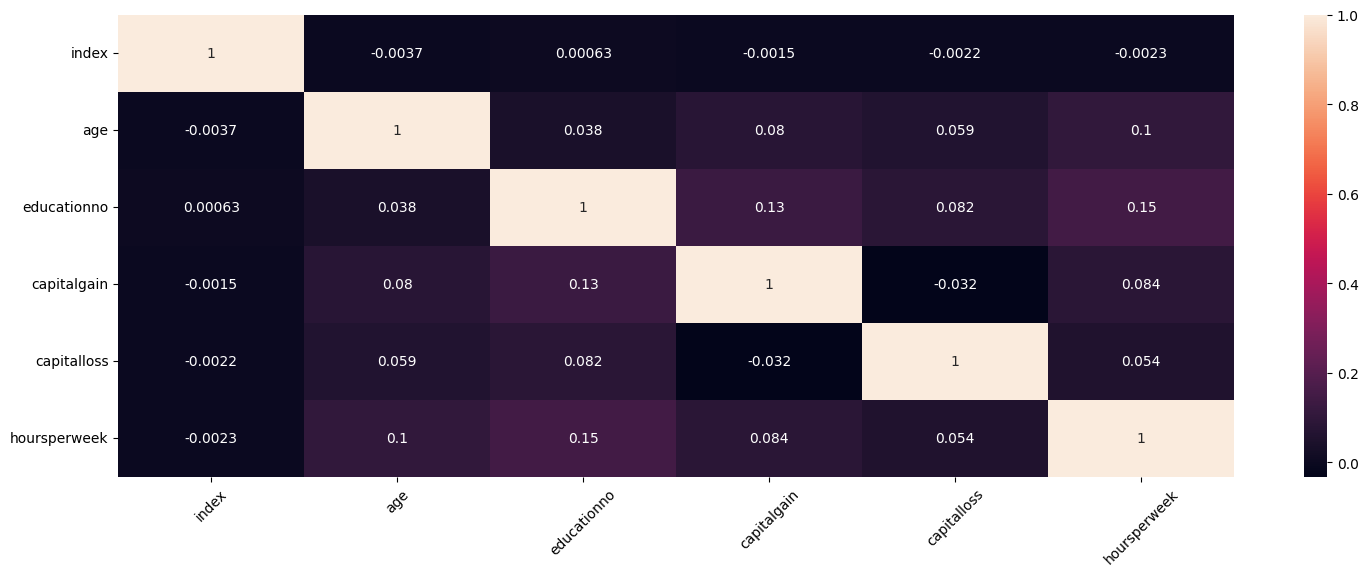

In [19]:
fig= plt.figure(figsize=(18, 6))
sns.heatmap(raw_data.corr(), annot=True);
plt.xticks(rotation=45)

# Lets analyze the continuous values by creating histograms to understand the distribution of the numerical features

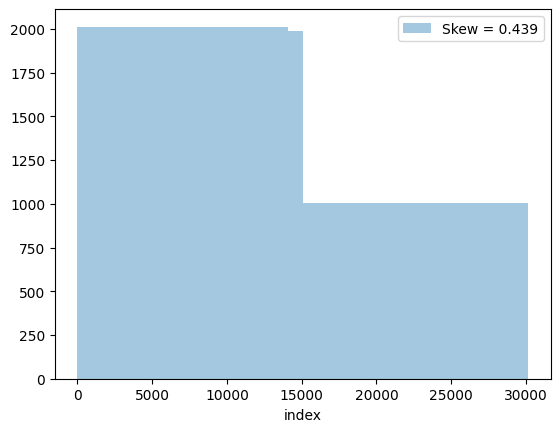

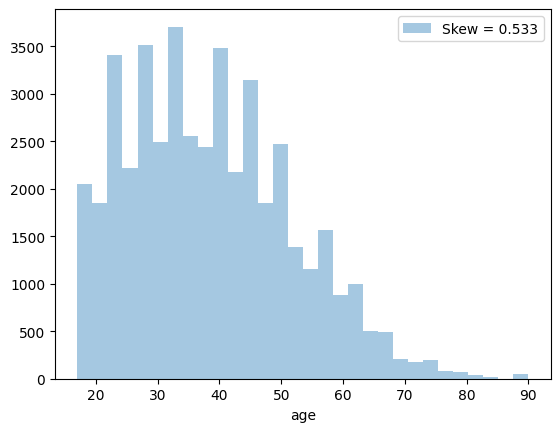

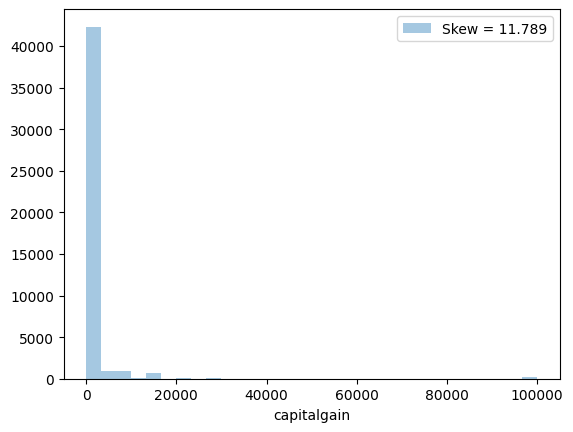

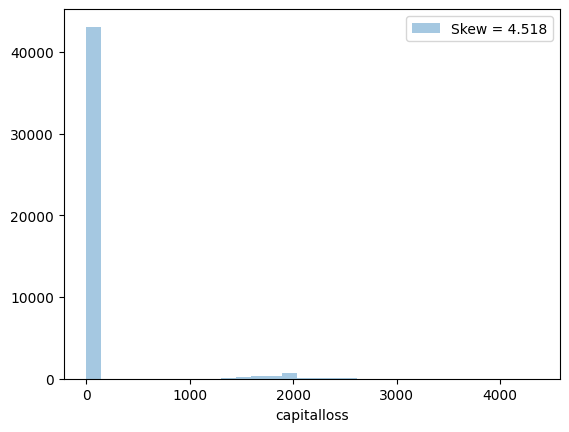

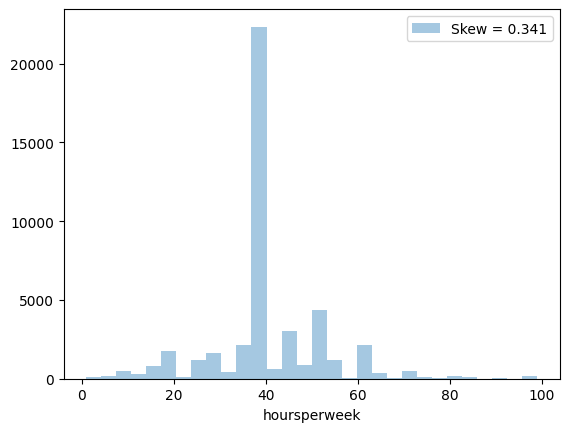

In [20]:
#  Univariate plots
for feat in continuous_feature:
    skew = raw_data[feat].skew()
    sns.distplot(raw_data[feat], kde= False, label='Skew = %.3f' %(skew), bins=30)
    plt.legend(loc='best')
    plt.show()

In [21]:
# Detect observations with more than one outlier

def outlier_hunt(df):
    """
    Takes a dataframe df of features and returns a list of the indices
    corresponding to the observations containing more than 2 outliers. 
    """
    outlier_indices = []
    
    # iterate over features(columns)
    for col in df.columns.tolist():
        # 1st quartile (25%)
        Q1 = np.percentile(df[col], 25)
        
        # 3rd quartile (75%)
        Q3 = np.percentile(df[col],75)
        
        # Interquartile rrange (IQR)
        IQR = Q3 - Q1
        
        # outlier step
        outlier_step = 1.5 * IQR
        
        # Determine a list of indices of outliers for feature col
        outlier_list_col = df[(df[col] < Q1 - outlier_step) | (df[col] > Q3 + outlier_step )].index
        
        # append the found outlier indices for col to the list of outlier indices 
        outlier_indices.extend(outlier_list_col)
        
    # select observations containing more than 2 outliers
    outlier_indices = Counter(outlier_indices)        
    multiple_outliers = list( k for k, v in outlier_indices.items() if v > 2 )
    
    return multiple_outliers   



In [22]:
continuous_feature

['index', 'age', 'capitalgain', 'capitalloss', 'hoursperweek']

# Outliers Detection

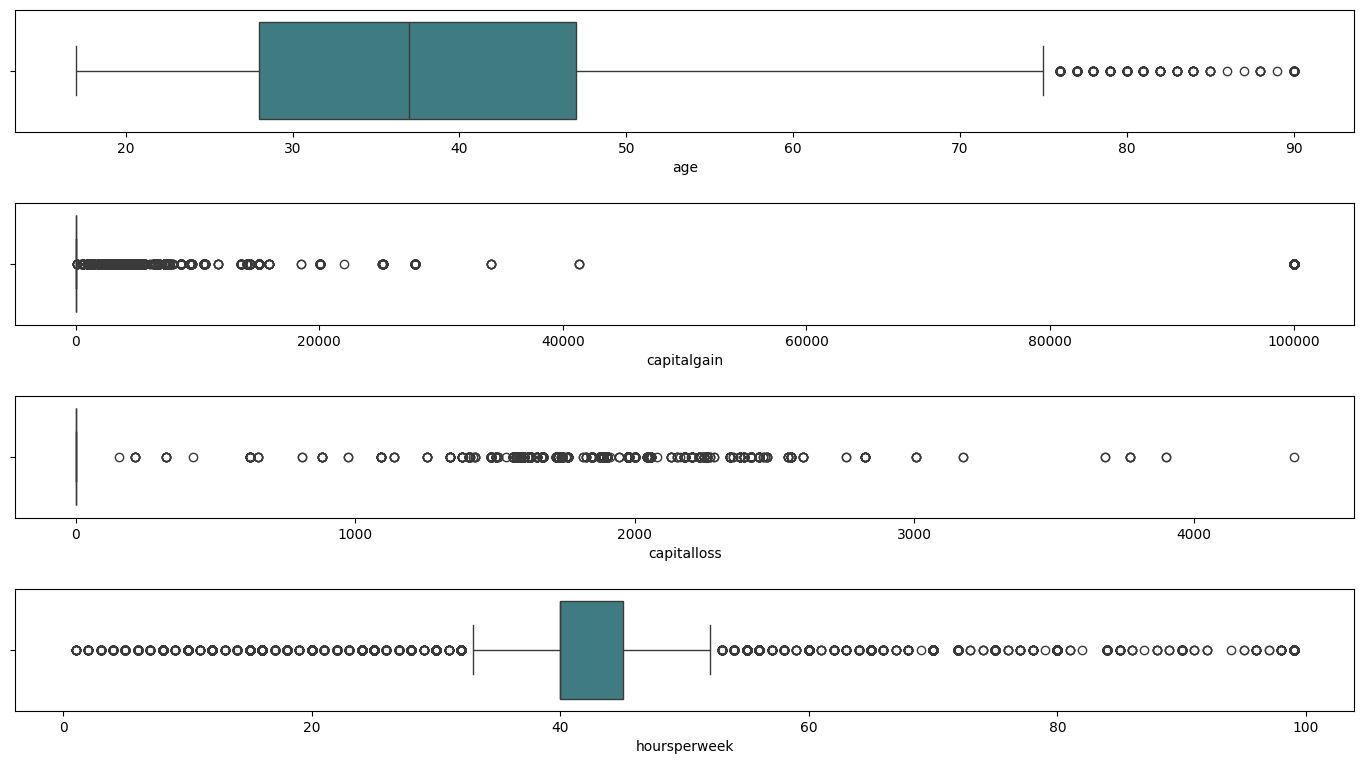

In [23]:
ot=raw_data.copy() 
fig, axes=plt.subplots(4,1,figsize=(14,8),sharex=False,sharey=False)
sns.boxplot(x='age',data=ot,palette='crest',ax=axes[0])
sns.boxplot(x='capitalgain',data=ot,palette='crest',ax=axes[1])
sns.boxplot(x='capitalloss',data=ot,palette='crest',ax=axes[2])
sns.boxplot(x='hoursperweek',data=ot,palette='crest',ax=axes[3])
plt.tight_layout(pad=2.0)

### There are lot of outliers present in the dataframe but we can't drop them because they are present in a very large quantity and can be important for model building

# After Log-Transformation

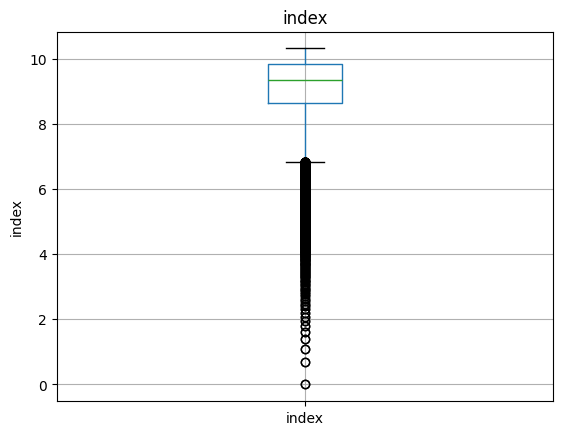

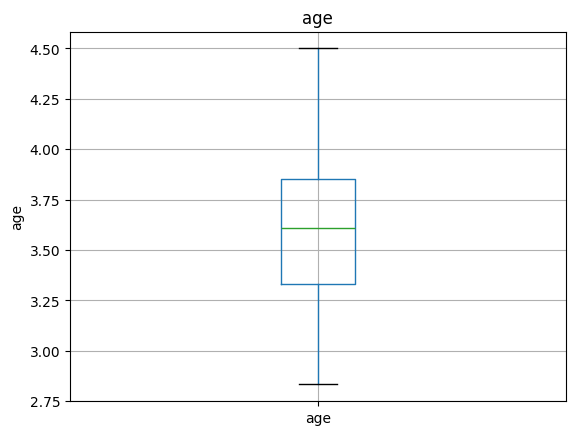

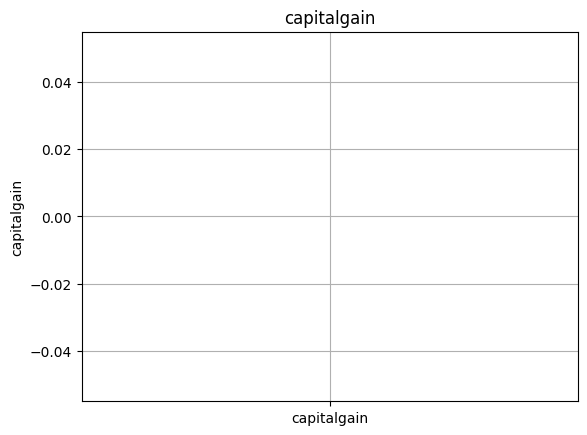

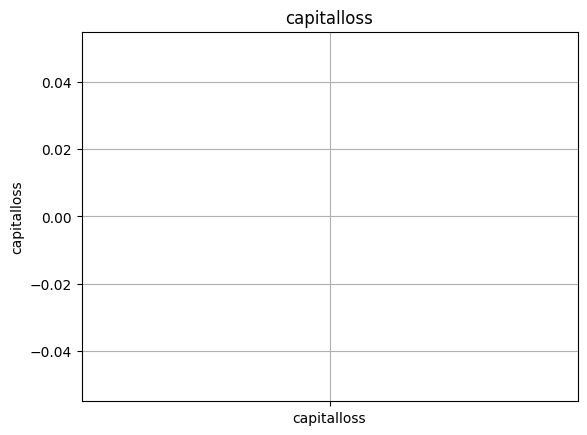

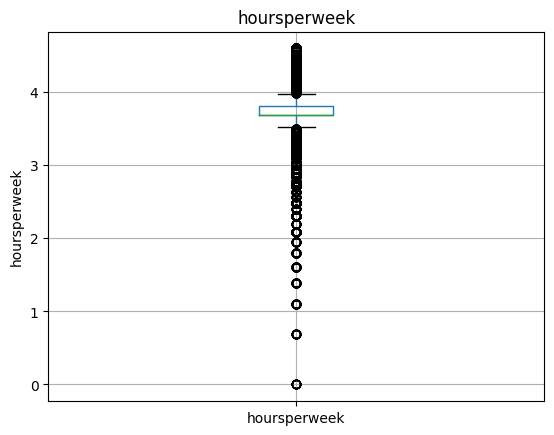

In [24]:
for feature in continuous_feature:
    data=raw_data.copy()
    data[feature]=np.log(data[feature])
    data.boxplot(column=feature)
    plt.ylabel(feature)
    plt.title(feature)
    plt.show()

# Visualize the distribution of 'age' and 'hoursperweek'

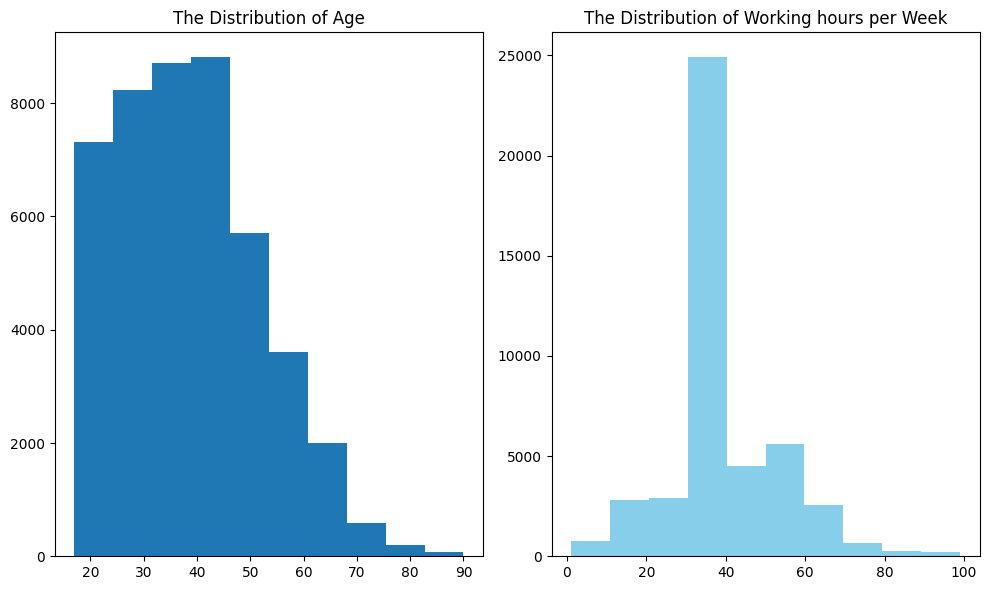

In [25]:
dist_age_balance = plt.figure(figsize = (10,6))

ra1 = dist_age_balance.add_subplot(1,2,1) 
ra2 = dist_age_balance.add_subplot(1,2,2)

ra1.hist(raw_data['age'])
ra1.set_title('The Distribution of Age')

ra2.hist(raw_data['hoursperweek'], color = 'skyblue')
ra2.set_title('The Distribution of Working hours per Week')

plt.tight_layout() 
plt.show()

In [26]:
raw_data[['age','hoursperweek']].describe()

age  hoursperweek
count  45221.000000  45221.000000
mean      38.548086     40.938038
std       13.217981     12.007640
min       17.000000      1.000000
25%       28.000000     40.000000
50%       37.000000     40.000000
75%       47.000000     45.000000
max       90.000000     99.000000

### The distribution of age: In this dataset, we have an extensive age range, from 17 to 90 years old. However, a majority of them are in the age of 20s and 40s (28 to 47 years old fall within the 25th to 75th percentiles). The distribution of customer age is fairly right skewed with a small standard deviation.

### The distribution of balance: The range of working hours per week is still fairly similar, from a minimum of 1 to a maximum of 100 hours, giving a range of 100 Hours. The distribution of balance is leptokurtica and fairly normally distributed

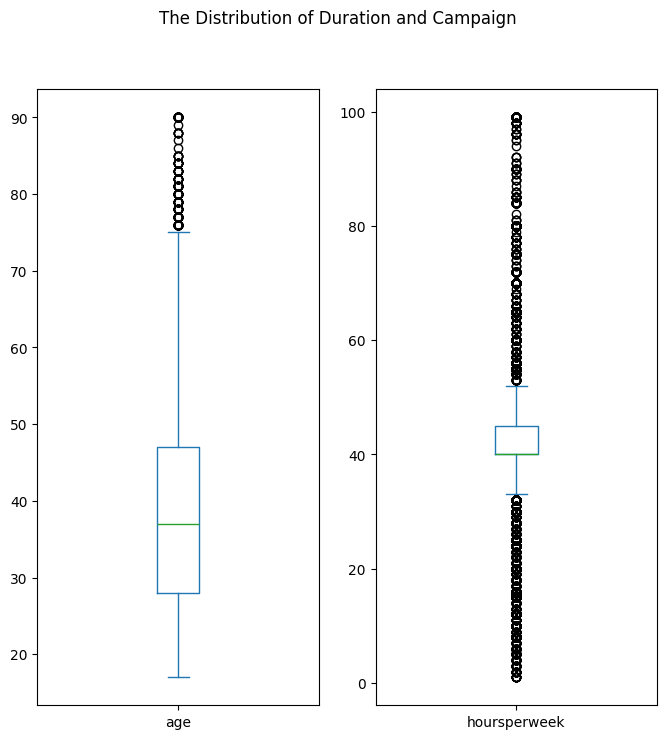

In [27]:
# Change the unit of 'duration' from seconds to minutes
df1 = raw_data.copy()
df1[['age','hoursperweek']].plot(kind = 'box', 
                                                      figsize = (8,8),
                                                      subplots = True, layout = (1,2),
                                                      sharex = False, sharey = False,
                                                      title='The Distribution of Duration and Campaign')
plt.show()

### The distribution of duration: As observed from the box plot, the duration of contact has a median of 3 minutes, with an interquartile range of 1.73 minutes to 5.3 minutes. The left-skewed boxplot indicates that most calls are relatively short. Also, there is a large number of outliers ranging from 10 minutes to 40 minutes, which are worth further study.The distribution of campagin: About half of the clients have been contacted by the bank for the second time, while 25% was first introduced to the term deposit. Most clients have been reached by the bank for one to three times, which is reasonable. However, some clients have been contacted by as high as 58 times, which is not normal. These clients may have some special needs that require frequent contact.

# Now let's look how numerical columns affect Salary. 

In [28]:
#age and salary

b_df = pd.DataFrame()
b_df['age_wrt_salary_more_than_50k'] = (raw_data[raw_data['Salary'] == ' <=50K'][['Salary','age']].describe())['age']
b_df['age_wrt_salary_less_than_50k'] = (raw_data[raw_data['Salary'] == ' >50K'][['Salary','age']].describe())['age']

b_df

age_wrt_salary_more_than_50k  age_wrt_salary_less_than_50k
count                  34013.000000                  11208.000000
mean                      36.749566                     44.006067
std                       13.564858                     10.340502
min                       17.000000                     19.000000
25%                       26.000000                     36.000000
50%                       34.000000                     43.000000
75%                       46.000000                     51.000000
max                       90.000000                     90.000000

<Axes: title={'center': 'Age and Salary statistics'}>

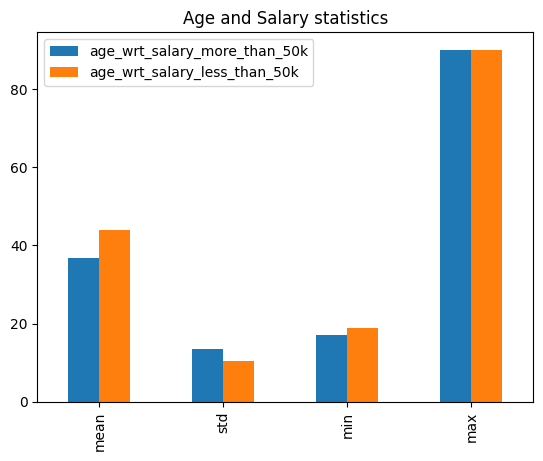

In [29]:
b_df.drop(['count', '25%', '50%', '75%']).plot.bar(title = 'Age and Salary statistics')

In [30]:
#capitalgain and salary

a_df = pd.DataFrame()
a_df['capitalgain_wrt_salary_more_than_50k'] = (raw_data[raw_data['Salary'] == ' <=50K'][['Salary','capitalgain']].describe())['capitalgain']
a_df['capitalgain_wrt_salary_less_than_50k'] = (raw_data[raw_data['Salary'] == ' >50K'][['Salary','capitalgain']].describe())['capitalgain']

a_df

capitalgain_wrt_salary_more_than_50k  \
count                          34013.000000   
mean                             149.027783   
std                              927.460669   
min                                0.000000   
25%                                0.000000   
50%                                0.000000   
75%                                0.000000   
max                            41310.000000   

       capitalgain_wrt_salary_less_than_50k  
count                          11208.000000  
mean                            3991.791667  
std                            14616.543746  
min                                0.000000  
25%                                0.000000  
50%                                0.000000  
75%                                0.000000  
max                            99999.000000

<Axes: title={'center': 'Capital Gain and Salary statistics'}>

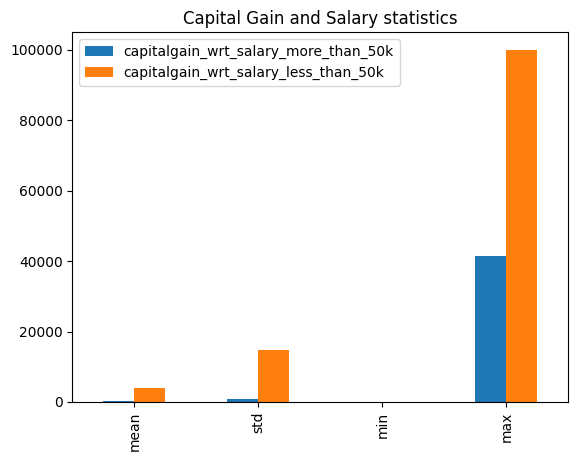

In [31]:
a_df.drop(['count', '25%', '50%', '75%']).plot.bar(title = 'Capital Gain and Salary statistics')

In [32]:
#capitalloss and deposit
c_df = pd.DataFrame()
c_df['capitalloss_wrt_salary_more_than_50k'] = (raw_data[raw_data['Salary'] == ' <=50K'][['Salary','capitalloss']].describe())['capitalloss']
c_df['capitalloss_wrt_salary_less_than_50k'] = (raw_data[raw_data['Salary'] == ' >50K'][['Salary','capitalloss']].describe())['capitalloss']

c_df

capitalloss_wrt_salary_more_than_50k  \
count                          34013.000000   
mean                              53.969188   
std                              312.007128   
min                                0.000000   
25%                                0.000000   
50%                                0.000000   
75%                                0.000000   
max                             4356.000000   

       capitalloss_wrt_salary_less_than_50k  
count                          11208.000000  
mean                             193.487063  
std                              592.642319  
min                                0.000000  
25%                                0.000000  
50%                                0.000000  
75%                                0.000000  
max                             3683.000000

<Axes: title={'center': 'Capital Loss and Salary statistics'}>

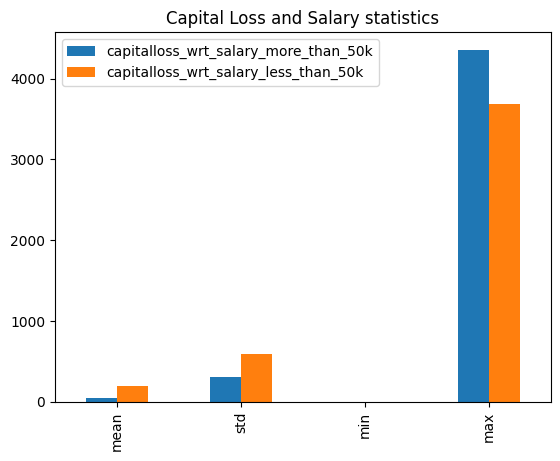

In [33]:
c_df.drop(['count', '25%', '50%', '75%']).plot.bar(title = 'Capital Loss and Salary statistics')

In [34]:
#hoursperweek and deposit
p_df = pd.DataFrame()
p_df['hoursperweek_wrt_salary_more_than_50k'] = (raw_data[raw_data['Salary'] == ' <=50K'][['Salary','hoursperweek']].describe())['hoursperweek']
p_df['hoursperweek_wrt_salary_less_than_50k'] = (raw_data[raw_data['Salary'] == ' >50K'][['Salary','hoursperweek']].describe())['hoursperweek']

p_df

hoursperweek_wrt_salary_more_than_50k  \
count                           34013.000000   
mean                               39.372005   
std                                11.974303   
min                                 1.000000   
25%                                37.000000   
50%                                40.000000   
75%                                40.000000   
max                                99.000000   

       hoursperweek_wrt_salary_less_than_50k  
count                           11208.000000  
mean                               45.690489  
std                                10.797764  
min                                 1.000000  
25%                                40.000000  
50%                                40.000000  
75%                                50.000000  
max                                99.000000

<Axes: title={'center': 'Working Hours per Week and Salary statistics'}>

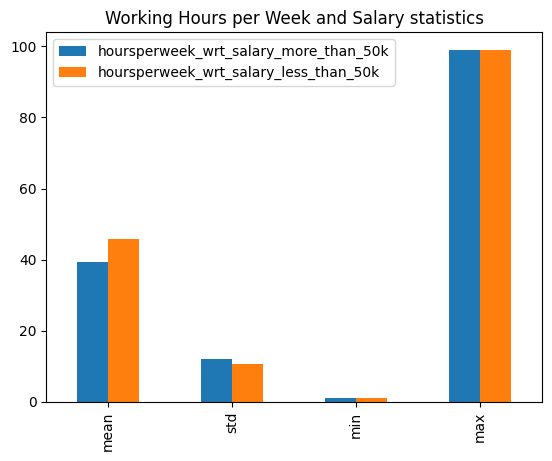

In [35]:
p_df.drop(['count', '25%', '50%', '75%']).plot.bar(title = 'Working Hours per Week and Salary statistics')

# Categorical Variables

In [36]:
categorical_features=[feature for feature in raw_data.columns if raw_data[feature].dtype=='O']
print('Number of Categorical Features:',len(categorical_features), '\n', categorical_features)
raw_data[categorical_features].head()

Number of Categorical Features: 9 
 ['workclass', 'education', 'maritalstatus', 'occupation', 'relationship', 'race', 'sex', 'native', 'Salary']


workclass   education        maritalstatus          occupation  \
0          State-gov   Bachelors        Never-married        Adm-clerical   
1   Self-emp-not-inc   Bachelors   Married-civ-spouse     Exec-managerial   
2            Private     HS-grad             Divorced   Handlers-cleaners   
3            Private        11th   Married-civ-spouse   Handlers-cleaners   
4            Private   Bachelors   Married-civ-spouse      Prof-specialty   

     relationship    race      sex          native  Salary  
0   Not-in-family   White     Male   United-States   <=50K  
1         Husband   White     Male   United-States   <=50K  
2   Not-in-family   White     Male   United-States   <=50K  
3         Husband   Black     Male   United-States   <=50K  
4            Wife   Black   Female            Cuba   <=50K

In [37]:
for feature in categorical_features:
    print("{} number of unique categories in feature named {}".format(len(raw_data[feature].unique()),feature))

7 number of unique categories in feature named workclass
16 number of unique categories in feature named education
7 number of unique categories in feature named maritalstatus
14 number of unique categories in feature named occupation
6 number of unique categories in feature named relationship
5 number of unique categories in feature named race
2 number of unique categories in feature named sex
40 number of unique categories in feature named native
2 number of unique categories in feature named Salary


In [38]:
# Decide which categorical variables you want to use in model
for feature in raw_data.columns:
    if raw_data[feature].dtypes == 'object':# in pandas it is object
        unique_cat = len(raw_data[feature].unique())
        print("Feature '{col_name}' has {unique_cat} unique categories".format(col_name=feature, unique_cat=unique_cat))
        print(raw_data[feature].value_counts())
        print()

Feature 'workclass' has 7 unique categories
 Private             33306
 Self-emp-not-inc     3796
 Local-gov            3100
 State-gov            1946
 Self-emp-inc         1646
 Federal-gov          1406
 Without-pay            21
Name: workclass, dtype: int64

Feature 'education' has 16 unique categories
 HS-grad         14783
 Some-college     9898
 Bachelors        7570
 Masters          2514
 Assoc-voc        1959
 11th             1619
 Assoc-acdm       1507
 10th             1223
 7th-8th           823
 Prof-school       785
 9th               676
 12th              577
 Doctorate         544
 5th-6th           449
 1st-4th           222
 Preschool          72
Name: education, dtype: int64

Feature 'maritalstatus' has 7 unique categories
 Married-civ-spouse       21055
 Never-married            14597
 Divorced                  6297
 Separated                 1411
 Widowed                   1277
 Married-spouse-absent      552
 Married-AF-spouse           32
Name: maritalstatus,

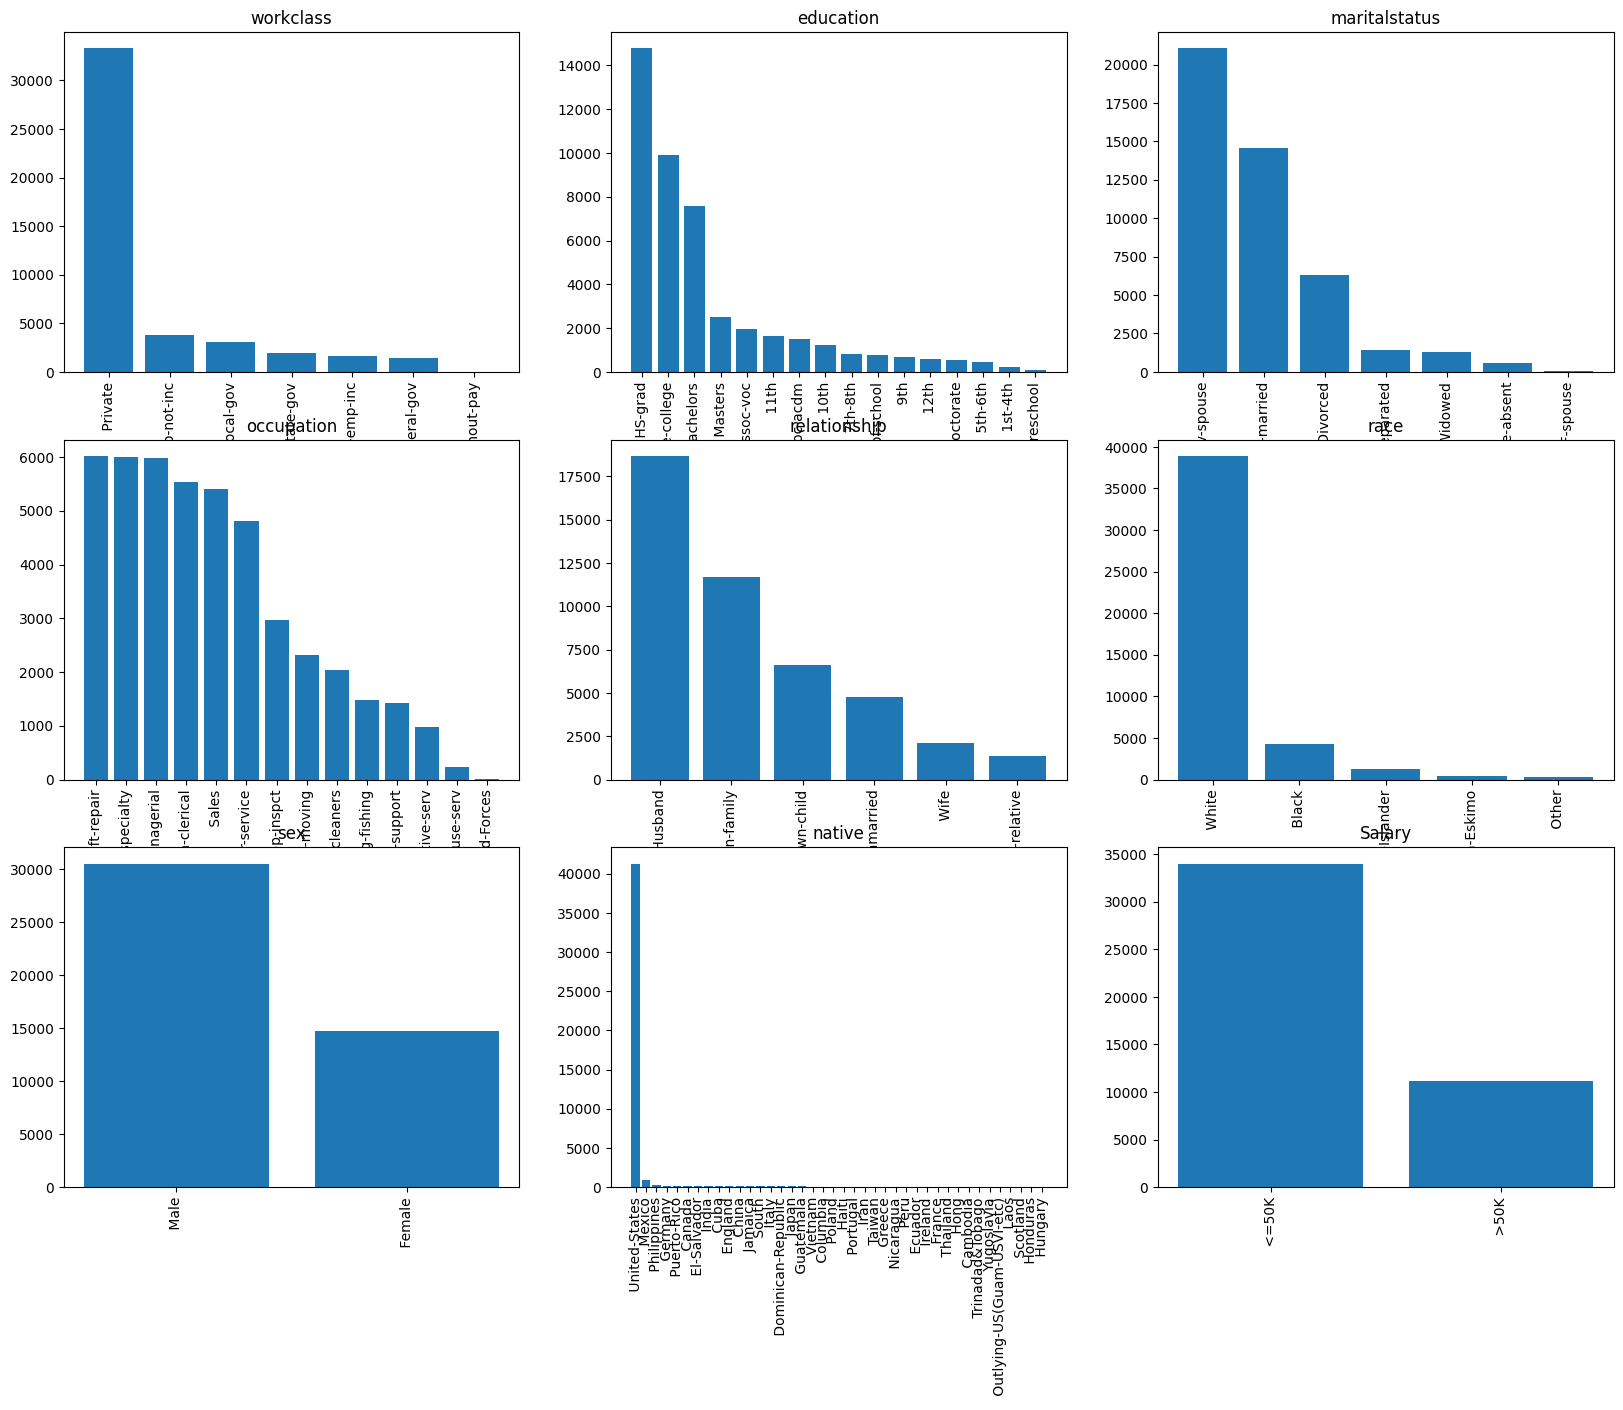

In [39]:
fig, axs = plt.subplots(3, 3, sharex=False, sharey=False, figsize=(20, 15))

counter = 0
for cat_column in categorical_features:
    value_counts = raw_data[cat_column].value_counts()
    
    trace_x = counter // 3
    trace_y = counter % 3
    x_pos = np.arange(0, len(value_counts))
    
    axs[trace_x, trace_y].bar(x_pos, value_counts.values, tick_label = value_counts.index)
    
    axs[trace_x, trace_y].set_title(cat_column)
    
    for tick in axs[trace_x, trace_y].get_xticklabels():
        tick.set_rotation(90)
    
    counter += 1

plt.show()

# Bar plot for all categorical variables in the dataset

Text(0.5, 1.0, 'Working Class')

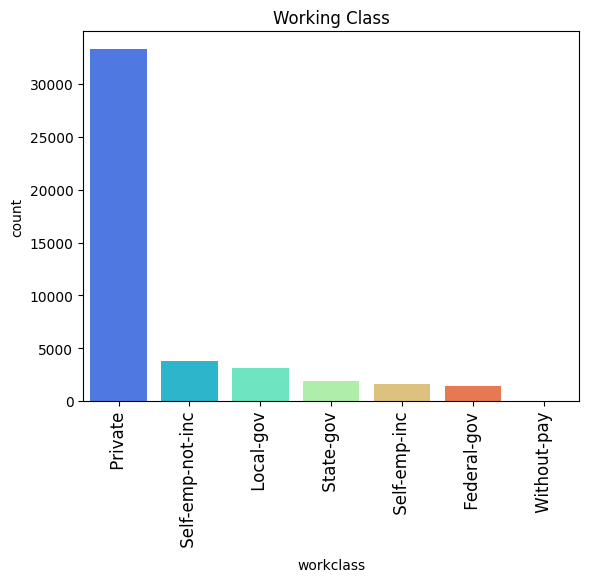

In [40]:
pal = sns.color_palette('rainbow')
sns.countplot(x='workclass', data=raw_data, palette = pal, 
              order=raw_data['workclass'].value_counts().index, );
plt.xticks(rotation = 90,fontsize = 12)
plt.title('Working Class')

Text(0.5, 1.0, 'Marital Status')

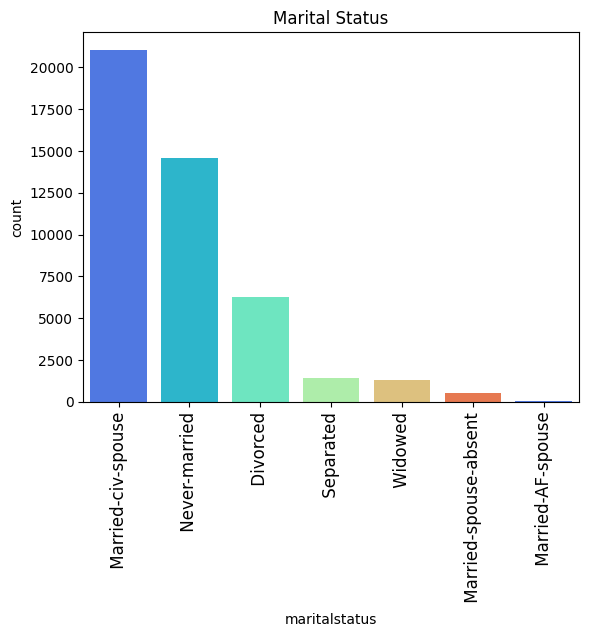

In [41]:
sns.countplot(x='maritalstatus', data=raw_data, palette = pal, 
              order=raw_data['maritalstatus'].value_counts().index)
plt.xticks(fontsize = 12,rotation = 90)
plt.title('Marital Status')

Text(0.5, 1.0, 'Education')

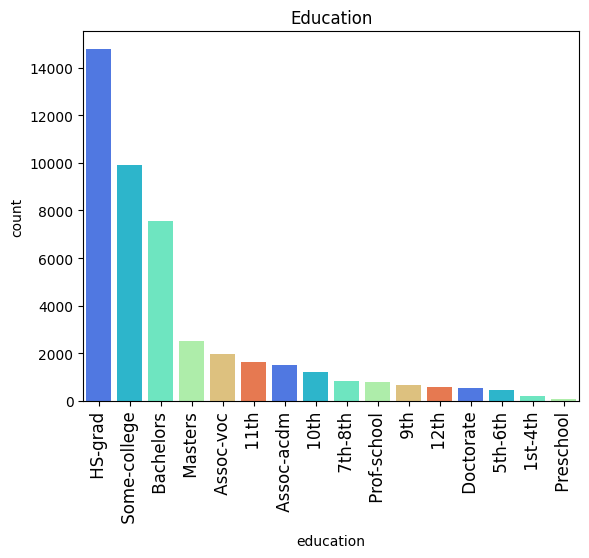

In [42]:
sns.countplot(x='education', data=raw_data, palette = pal, 
              order=raw_data['education'].value_counts().index)
plt.xticks(fontsize = 12,rotation = 90)
plt.title('Education')

Text(0.5, 1.0, 'Relationship')

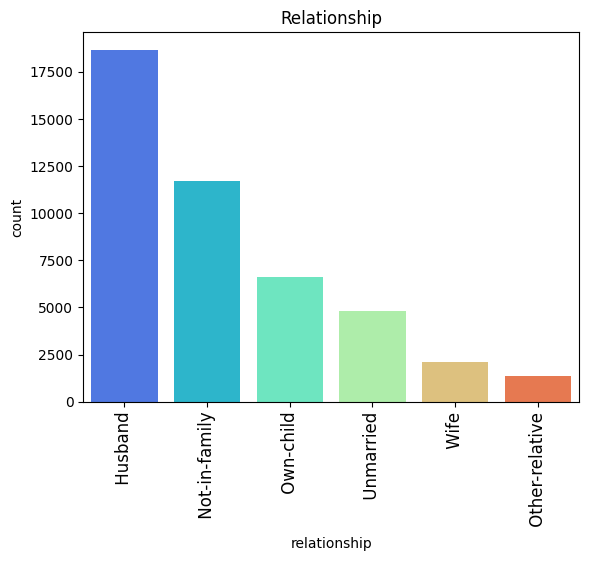

In [43]:
sns.countplot(x='relationship', data=raw_data, palette = pal, 
              order=raw_data['relationship'].value_counts().index)
plt.xticks(fontsize = 12,rotation = 90)
plt.title('Relationship')

Text(0.5, 1.0, 'Sex')

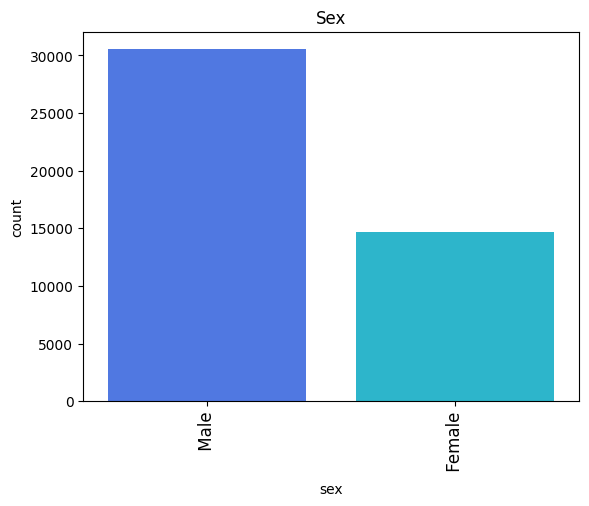

In [44]:
sns.countplot(x='sex', data=raw_data, palette = pal, 
              order=raw_data['sex'].value_counts().index)
plt.xticks(fontsize = 12,rotation=90)
plt.title('Sex')

Text(0.5, 1.0, 'Native')

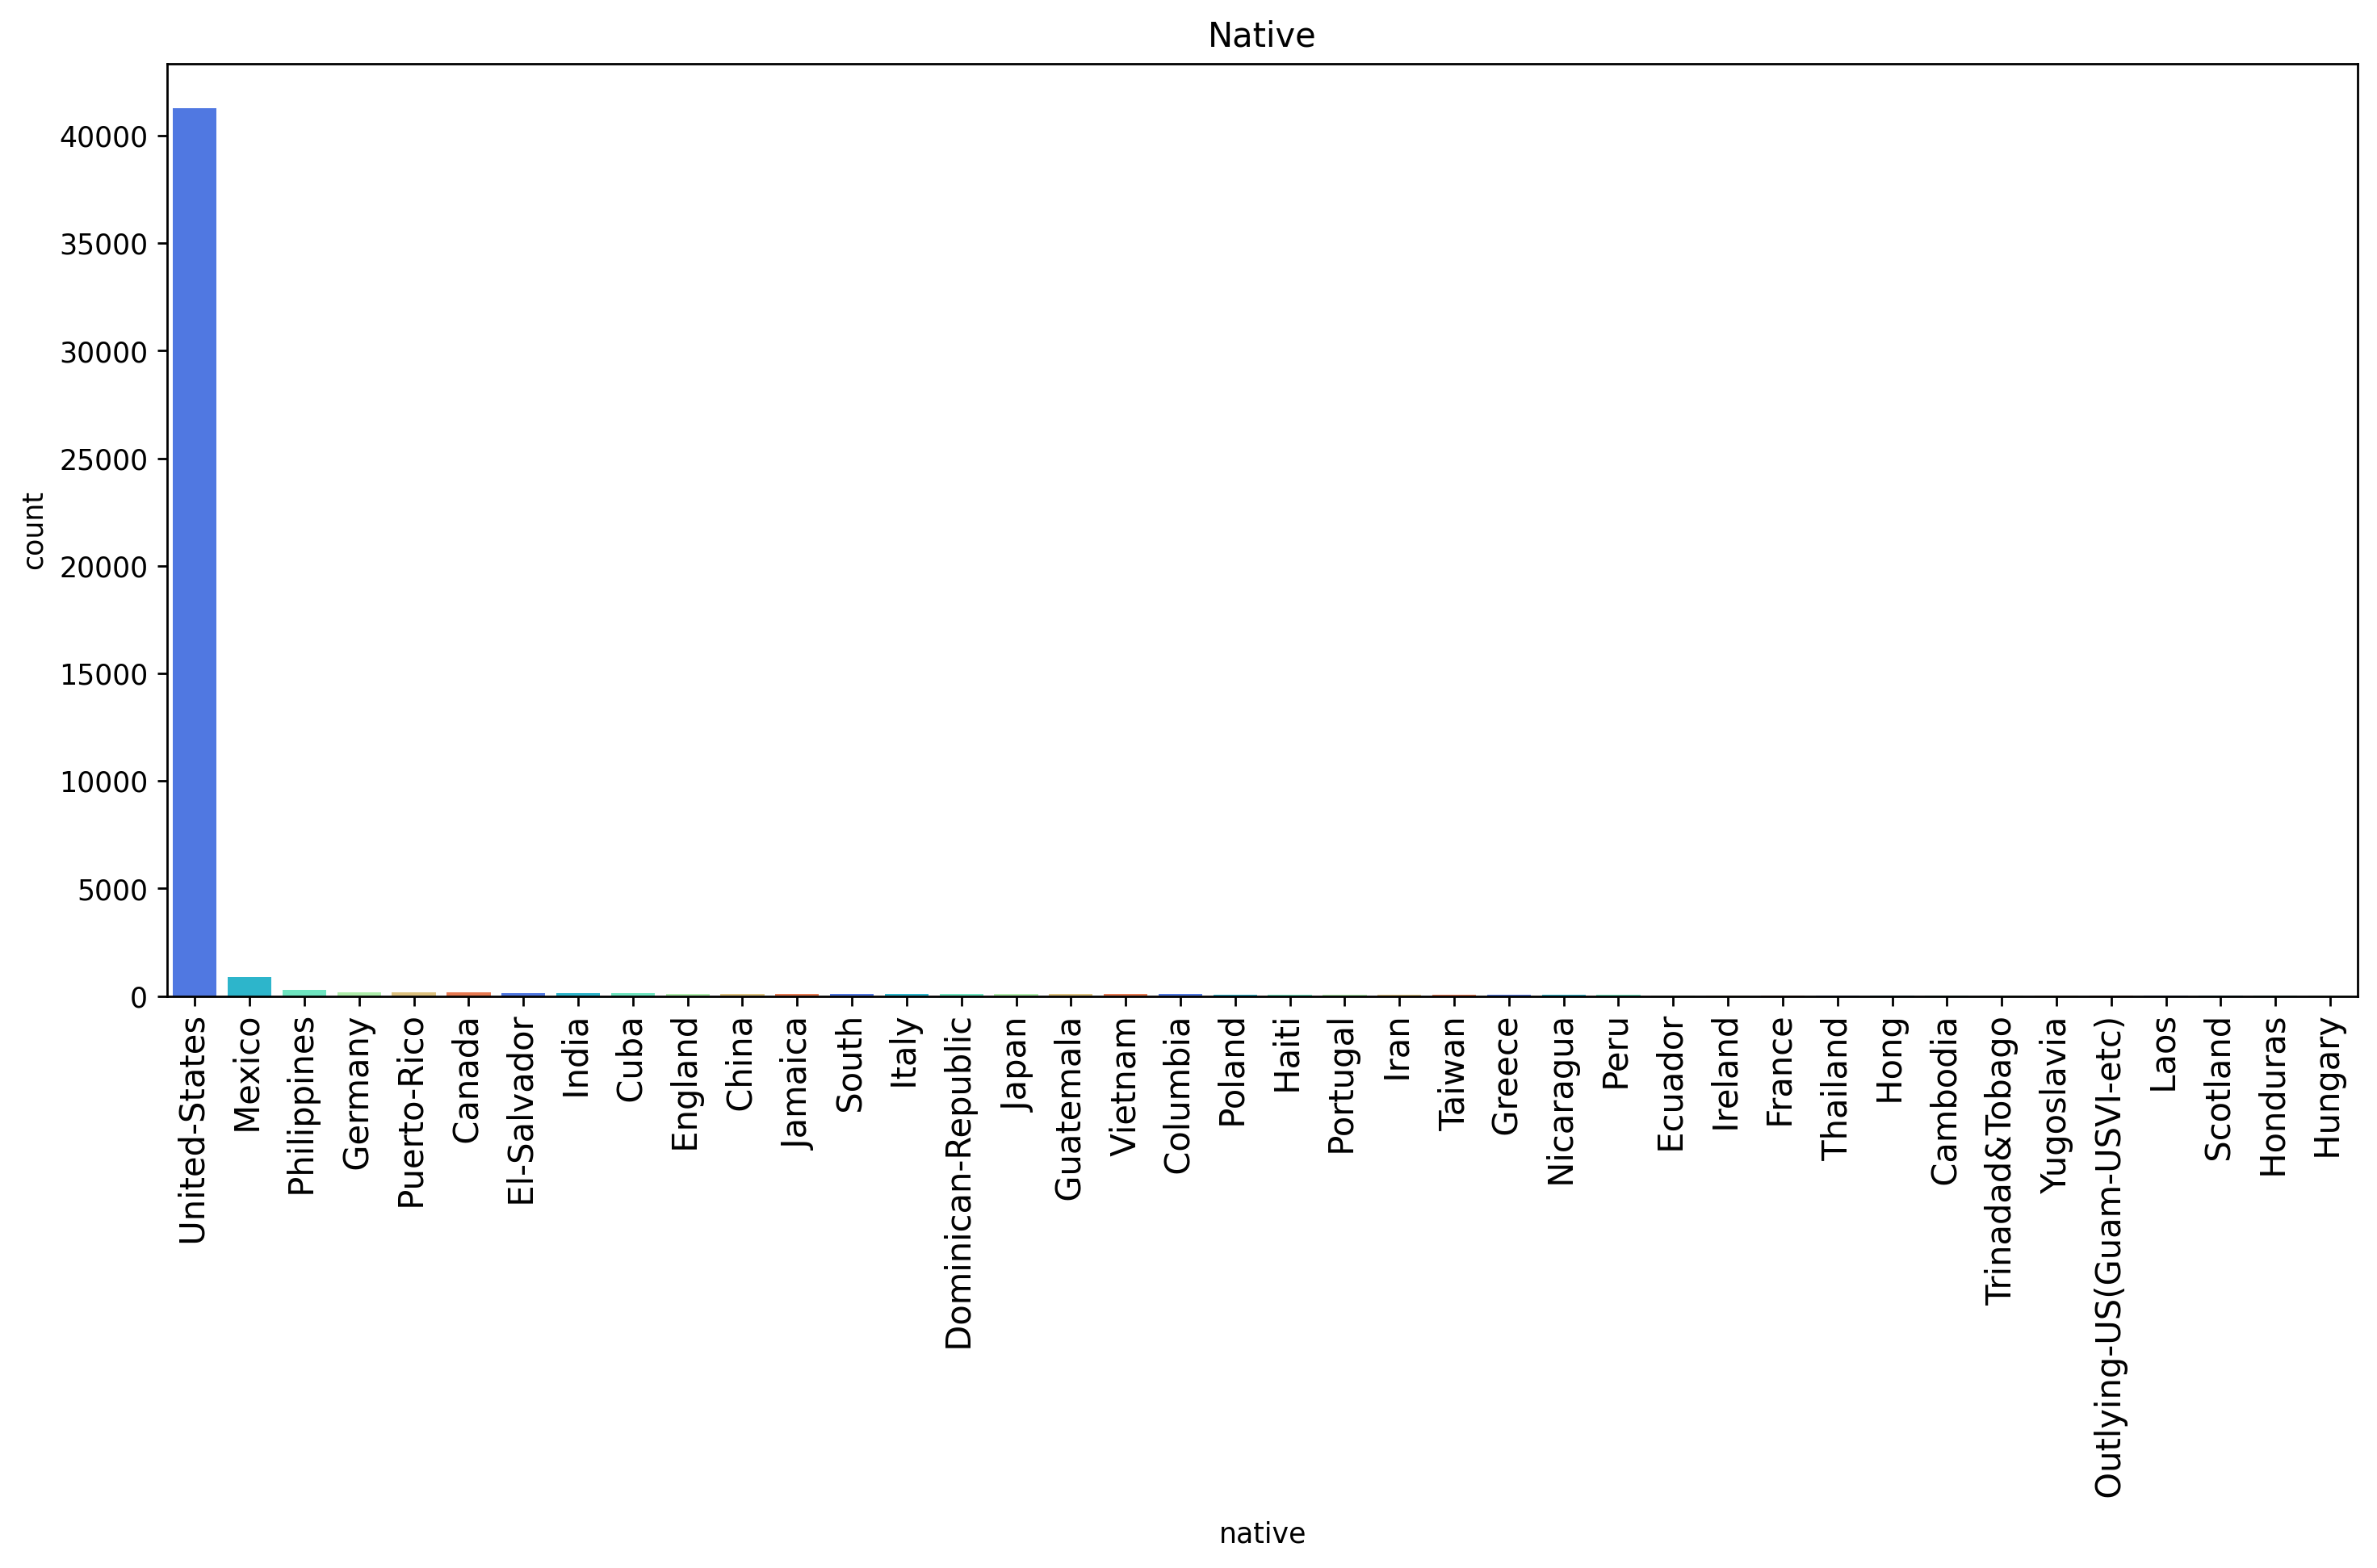

In [45]:
plt.figure(figsize=(14,6),dpi=250)
sns.countplot(x='native', data=raw_data, palette = pal, 
              order=raw_data['native'].value_counts().index)
plt.xticks(fontsize = 12,rotation=90)
plt.title('Native')

# Analysis of the response column'.

In [46]:
countlessthanfiftyk = len(raw_data[raw_data.Salary == ' <=50K'])
countgreatthanfiftyk = len(raw_data[raw_data.Salary == ' >50K'])
print("Percentage of Employees with Salary greater than 50k: {:.2f}%".format((countgreatthanfiftyk / (len(raw_data.Salary))*100)))
print("Percentage of Employees with Salary lesser than 50k: {:.2f}%".format((countlessthanfiftyk / (len(raw_data.Salary))*100)))

Percentage of Employees with Salary greater than 50k: 24.78%
Percentage of Employees with Salary lesser than 50k: 75.22%


In [47]:
raw_data.Salary.value_counts()

 <=50K    34013
 >50K     11208
Name: Salary, dtype: int64

Text(0.5, 1.0, 'Salary')

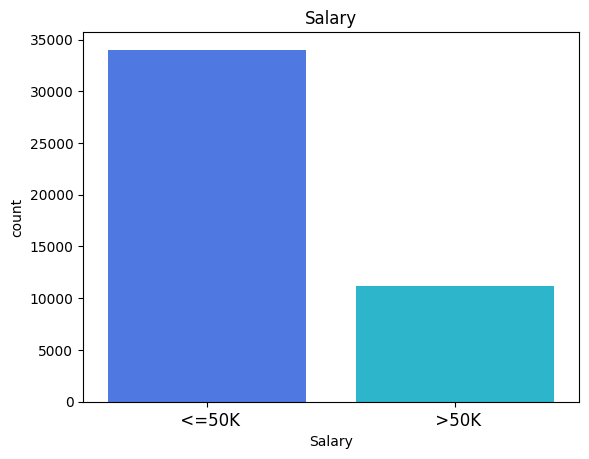

In [48]:
pal = sns.color_palette('rainbow')
sns.countplot(x='Salary', data=raw_data, palette = pal, 
              order=raw_data['Salary'].value_counts().index, );
plt.xticks(fontsize = 12)
plt.title('Salary')

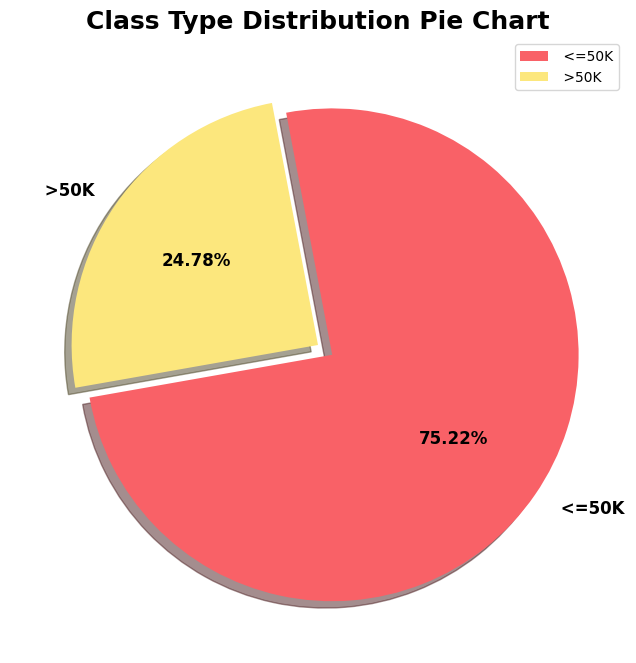

In [49]:
plt.figure(figsize = (12,8))
plt.pie(raw_data['Salary'].value_counts(),
       labels=raw_data.Salary.unique(),
       explode = [0.07,0.0],
       autopct= '%.2f%%',
        colors = ["#F96167", "#FCE77D"],
       shadow= True,
       startangle= 190,
       textprops = {'size':'large',
                   'fontweight':'bold',
                    'rotation':'horizontal',
                   'color':'black'})
plt.legend(loc= 'upper right')
plt.title("Class Type Distribution Pie Chart", fontsize = 18, fontweight = 'bold')
plt.show()

# Data Visualization

### Bivariate Analysis

<Axes: >

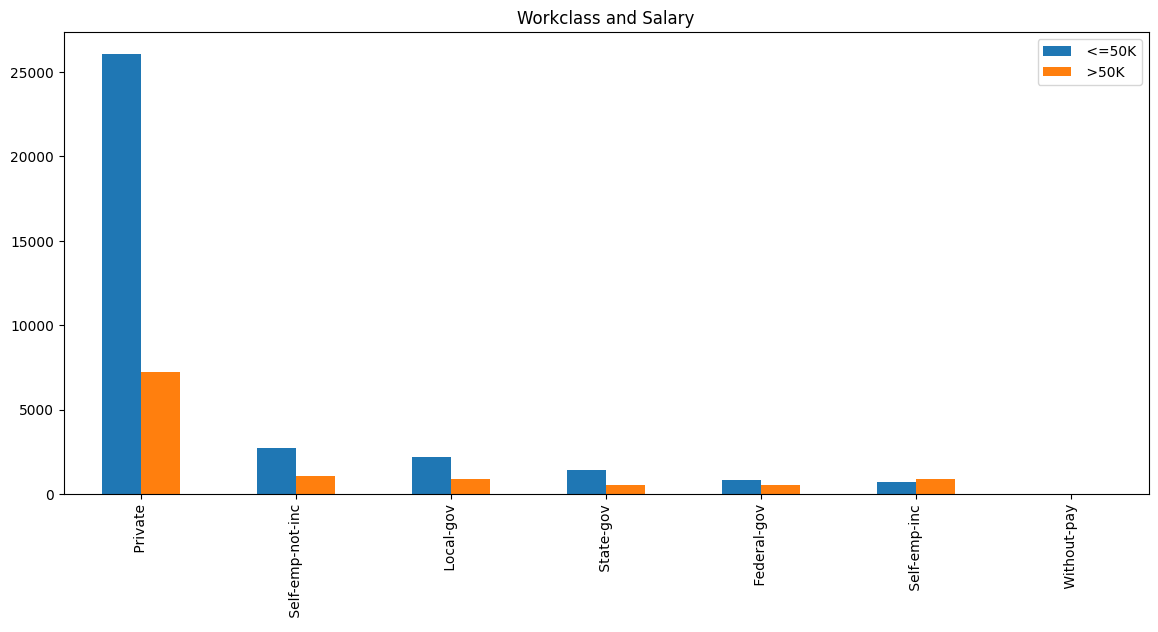

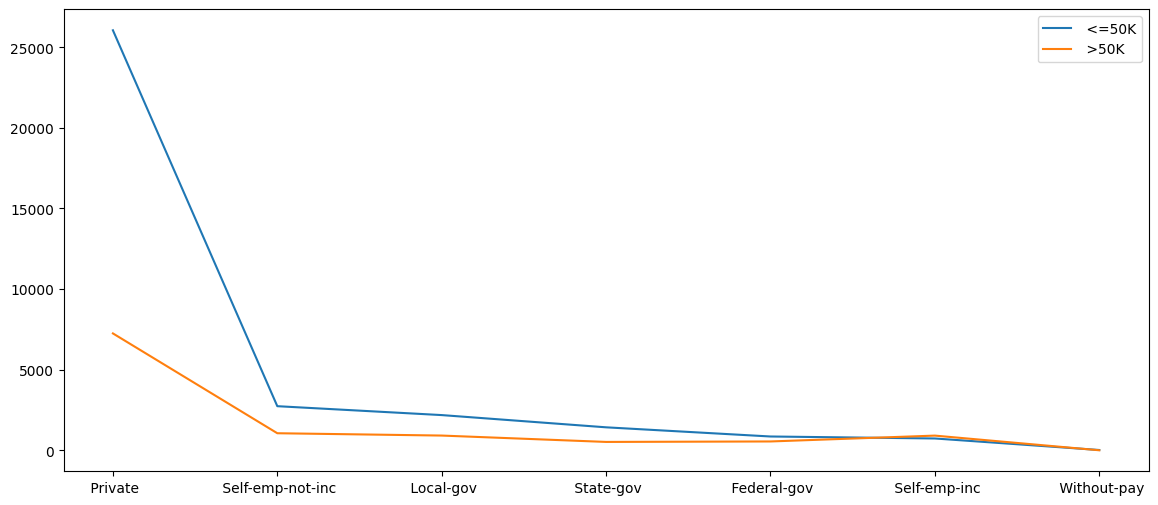

In [50]:
#workclass and Salary
j_df = pd.DataFrame()

j_df[' <=50K'] = raw_data[raw_data['Salary'] == ' <=50K']['workclass'].value_counts()
j_df[' >50K'] = raw_data[raw_data['Salary'] == ' >50K']['workclass'].value_counts()
j_df.plot.bar(title = 'Workclass and Salary',figsize=(14,6))
j_df.plot(figsize=(14,6))

<Axes: xlabel='Salary', ylabel='workclass'>

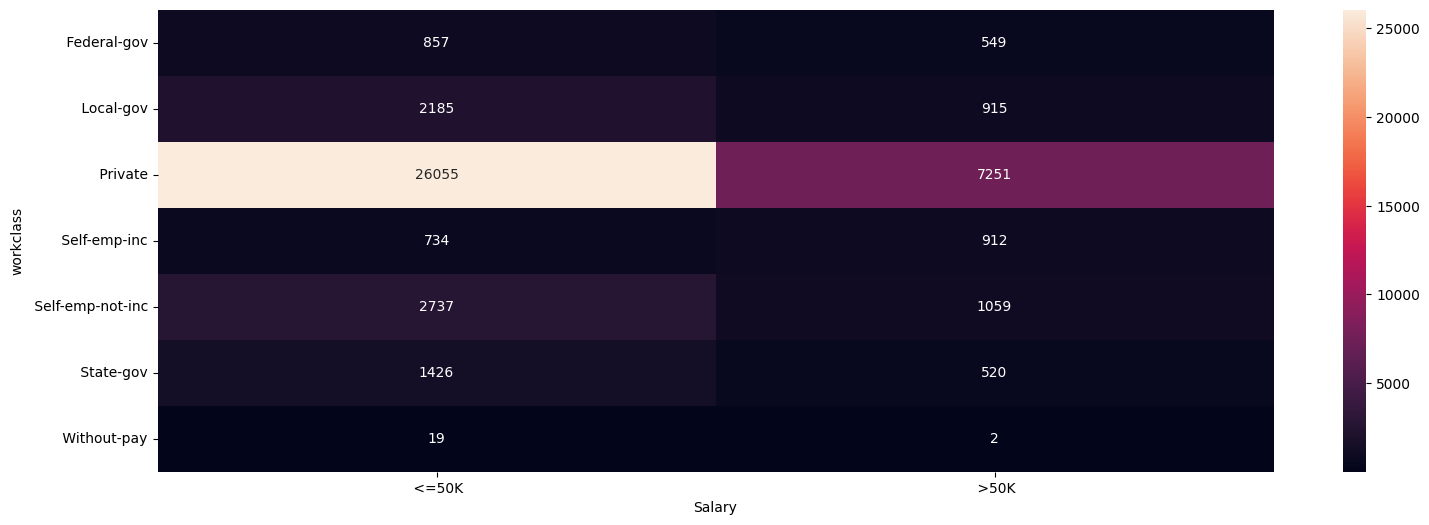

In [51]:
fig= plt.figure(figsize=(18, 6))
sns.heatmap(pd.crosstab(index=raw_data['workclass'], columns=raw_data['Salary']), annot=True, 
            fmt='g')

<Axes: >

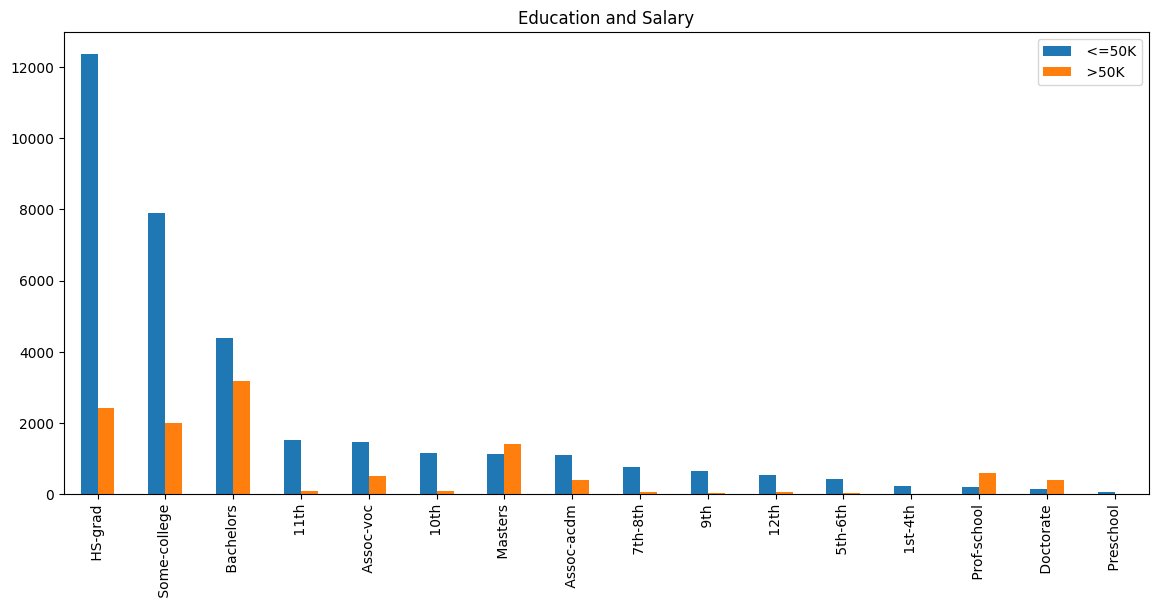

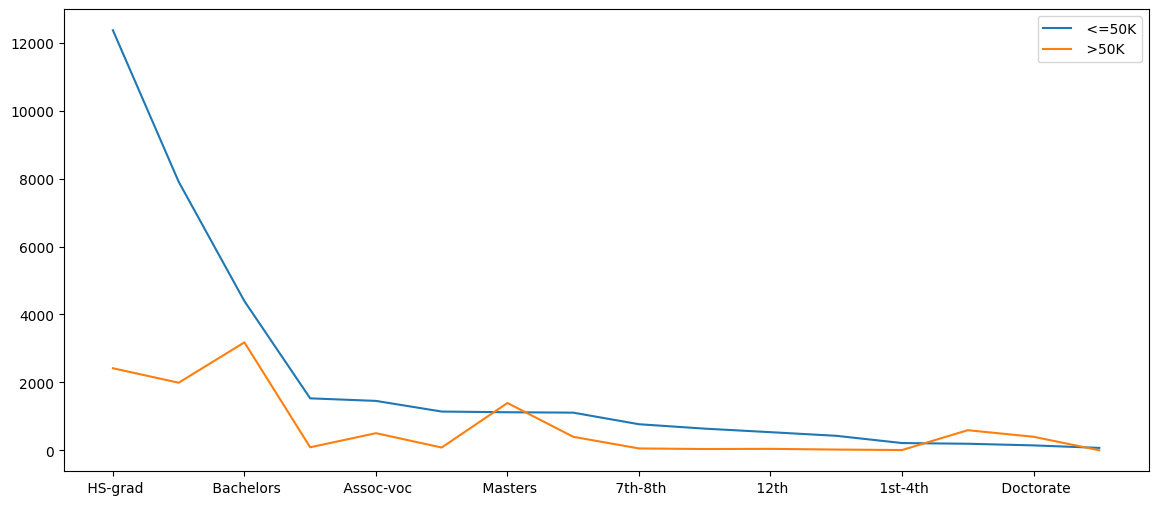

In [52]:
#Education and Salary
j_df = pd.DataFrame()

j_df[' <=50K'] = raw_data[raw_data['Salary'] == ' <=50K']['education'].value_counts()
j_df[' >50K'] = raw_data[raw_data['Salary'] == ' >50K']['education'].value_counts()
j_df.plot.bar(title = 'Education and Salary',figsize=(14,6))
j_df.plot(figsize=(14,6))

<Axes: xlabel='Salary', ylabel='education'>

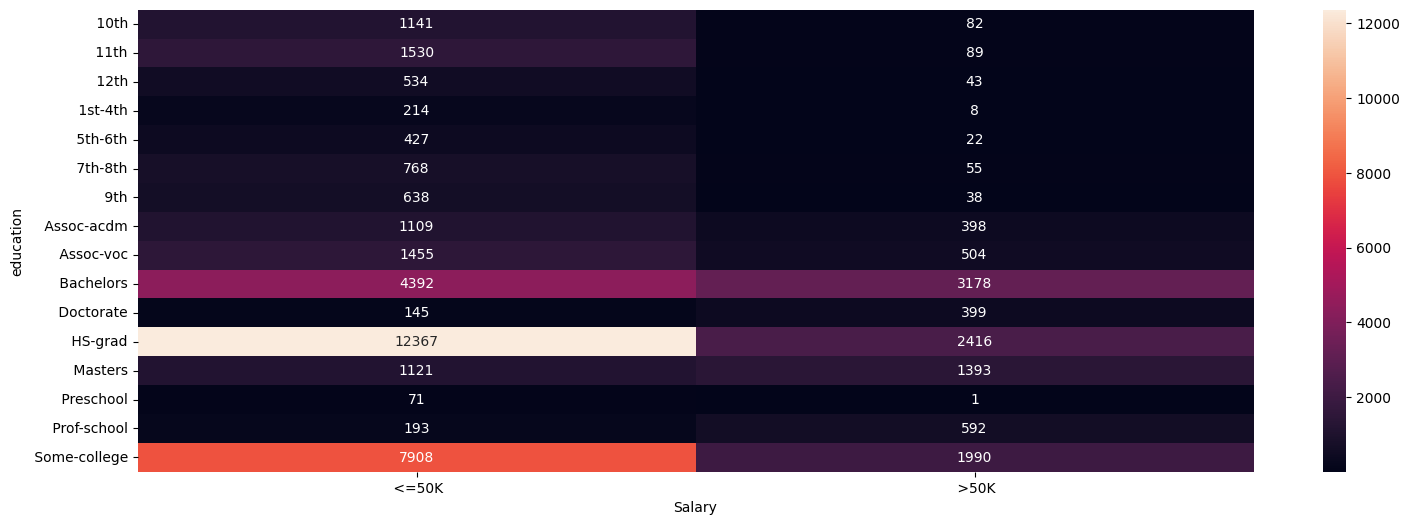

In [53]:
fig= plt.figure(figsize=(18, 6))
sns.heatmap(pd.crosstab(index=raw_data['education'], columns=raw_data['Salary']), annot=True, 
            fmt='g')

<Axes: >

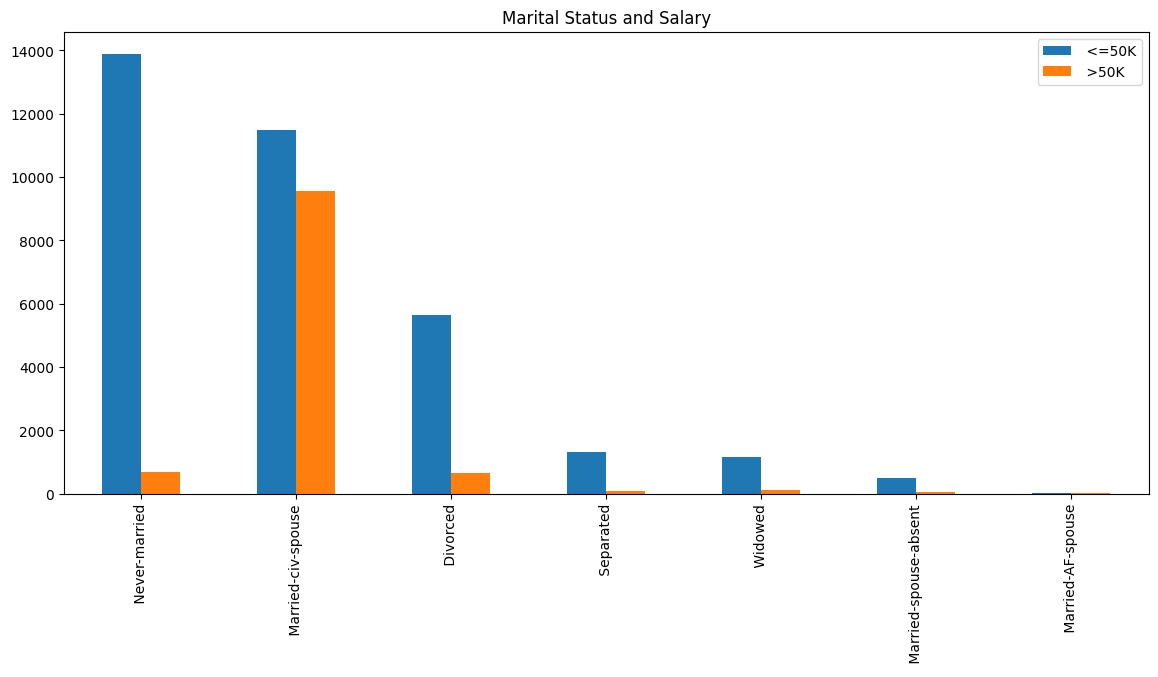

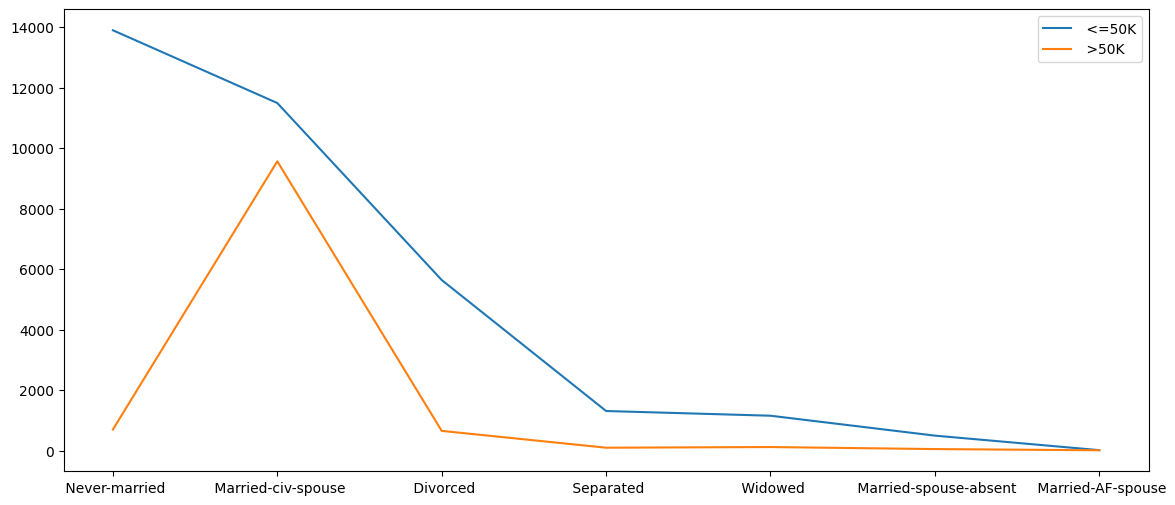

In [54]:
#maritalstatus and Salary
j_df = pd.DataFrame()

j_df[' <=50K'] = raw_data[raw_data['Salary'] == ' <=50K']['maritalstatus'].value_counts()
j_df[' >50K'] = raw_data[raw_data['Salary'] == ' >50K']['maritalstatus'].value_counts()
j_df.plot.bar(title = 'Marital Status and Salary',figsize=(14,6))
j_df.plot(figsize=(14,6))

<Axes: xlabel='Salary', ylabel='maritalstatus'>

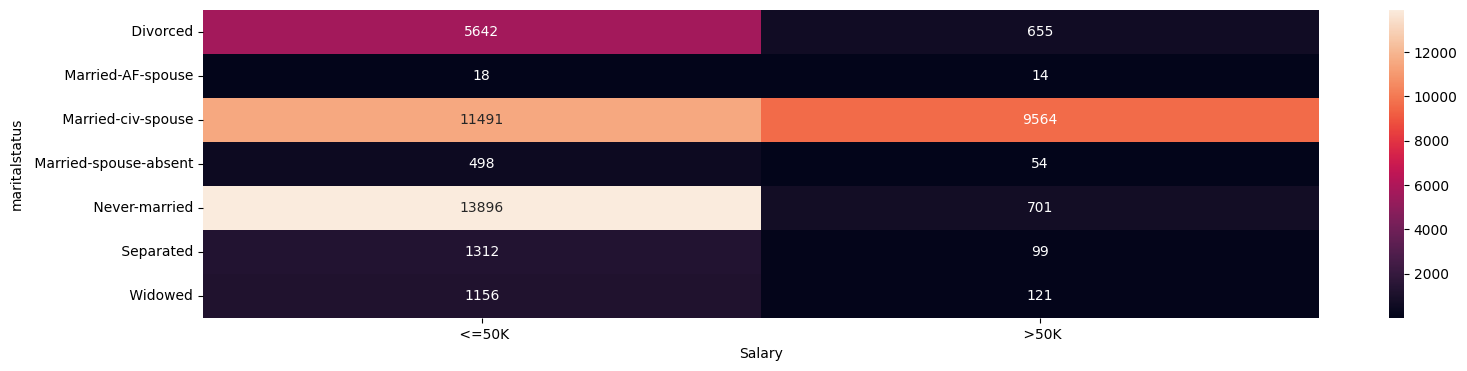

In [55]:
fig= plt.figure(figsize=(18, 4))
sns.heatmap(pd.crosstab(index=raw_data['maritalstatus'], columns=raw_data['Salary']), annot=True, 
            fmt='g')

<Axes: >

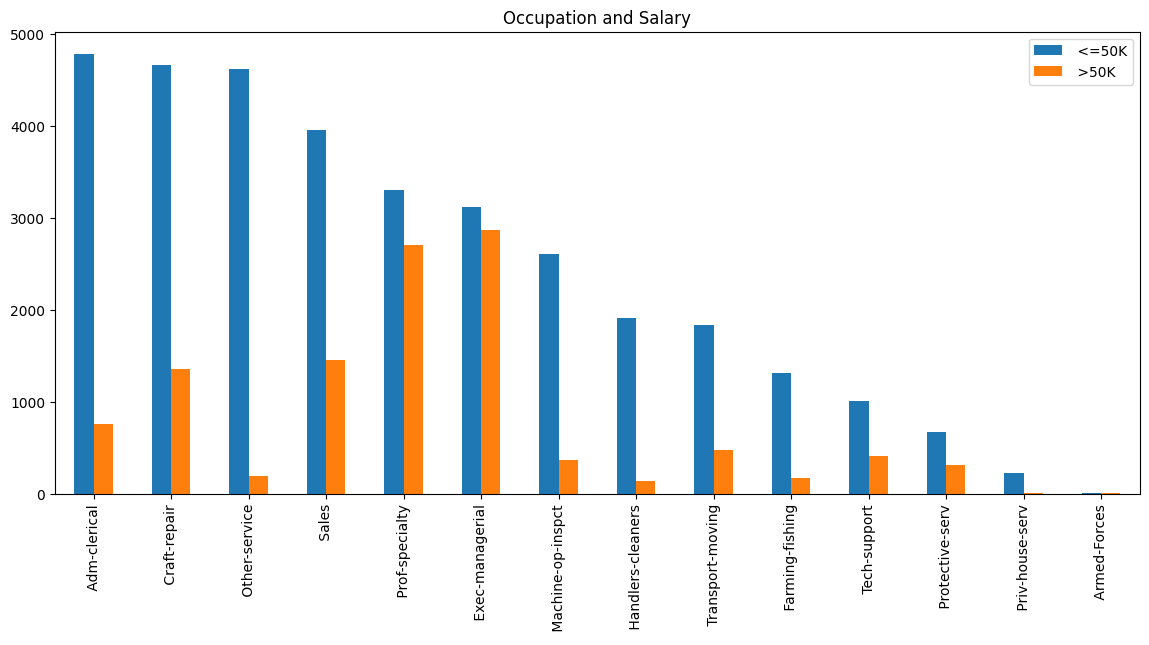

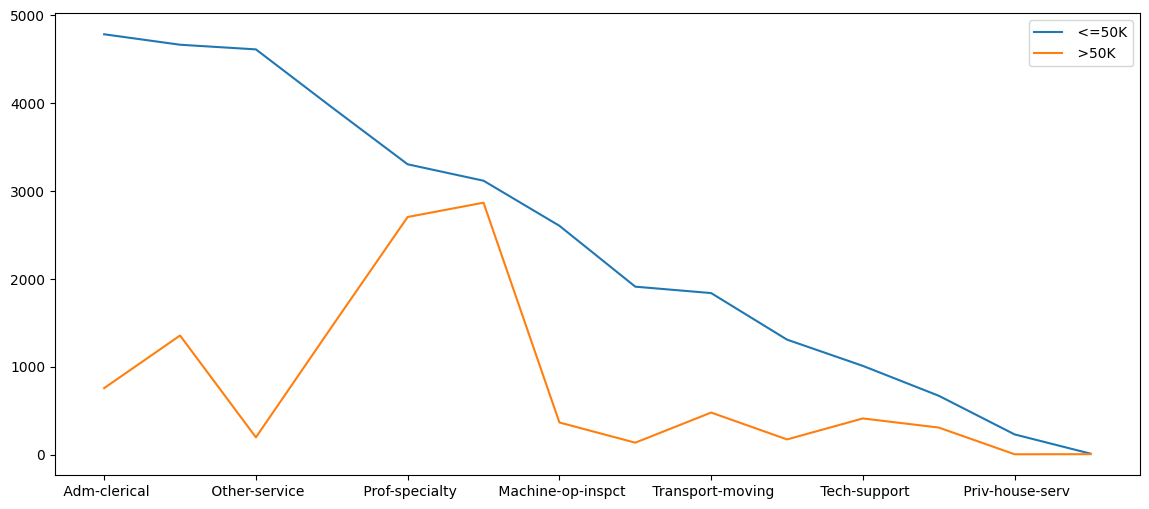

In [56]:
#occupation and Salary
j_df = pd.DataFrame()

j_df[' <=50K'] = raw_data[raw_data['Salary'] == ' <=50K']['occupation'].value_counts()
j_df[' >50K'] = raw_data[raw_data['Salary'] == ' >50K']['occupation'].value_counts()
j_df.plot.bar(title = 'Occupation and Salary',figsize=(14,6))
j_df.plot(figsize=(14,6))

<Axes: xlabel='Salary', ylabel='occupation'>

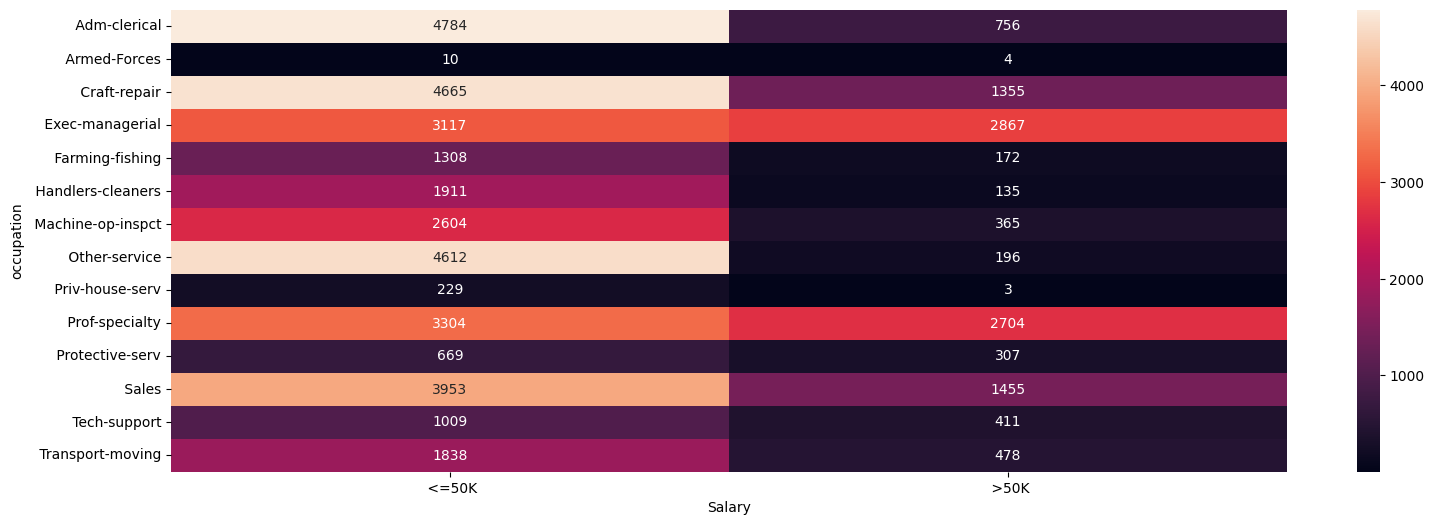

In [57]:
fig= plt.figure(figsize=(18, 6))
sns.heatmap(pd.crosstab(index=raw_data['occupation'], columns=raw_data['Salary']), annot=True, 
            fmt='g')

<Axes: >

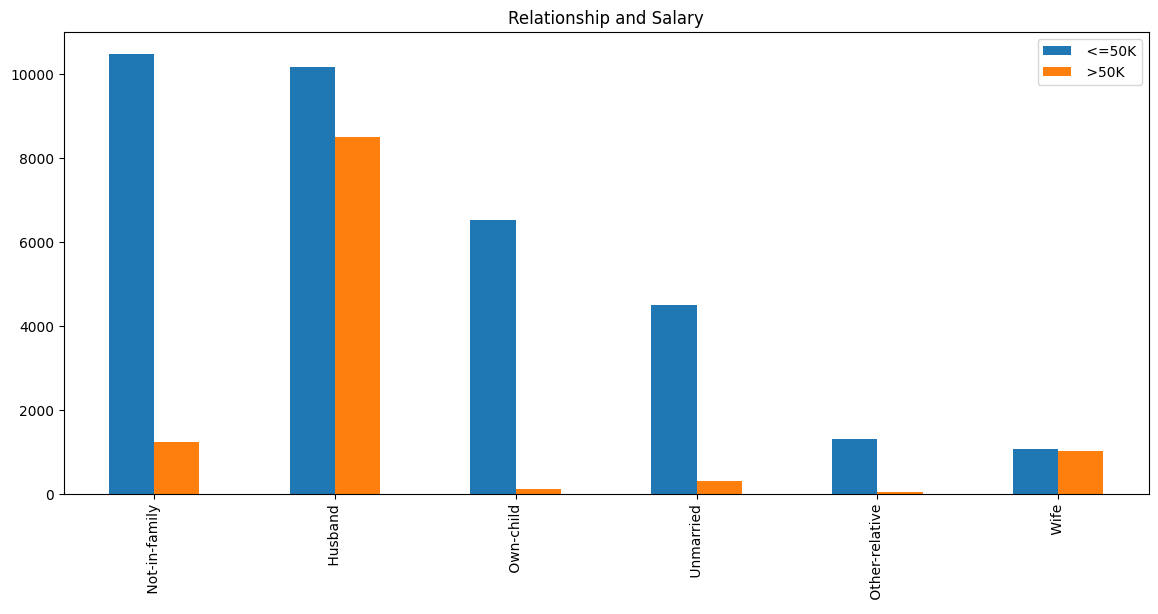

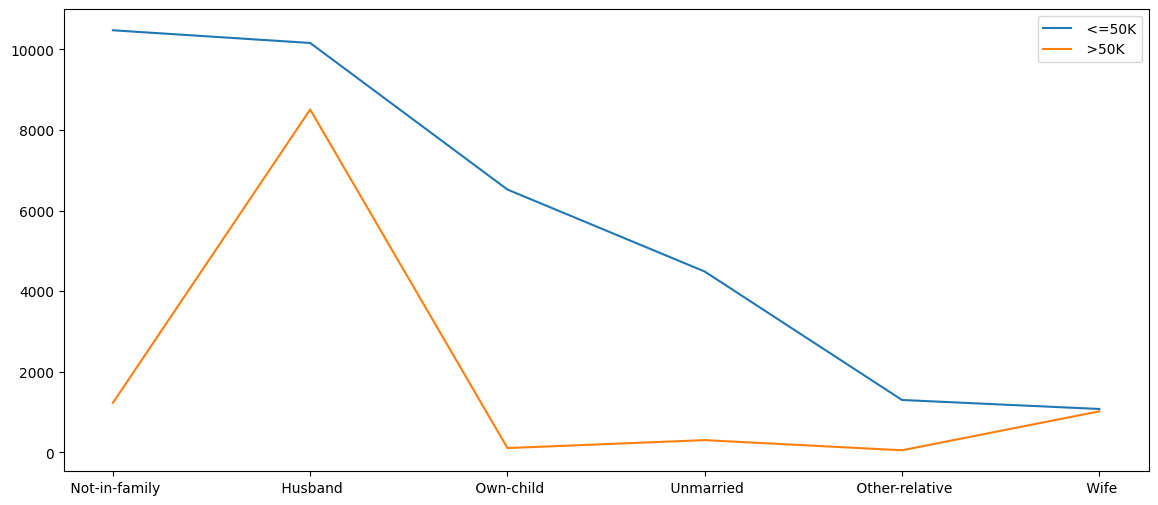

In [58]:
#relationship and Salary
j_df = pd.DataFrame()

j_df[' <=50K'] = raw_data[raw_data['Salary'] == ' <=50K']['relationship'].value_counts()
j_df[' >50K'] = raw_data[raw_data['Salary'] == ' >50K']['relationship'].value_counts()
j_df.plot.bar(title = 'Relationship and Salary',figsize=(14,6))
j_df.plot(figsize=(14,6))

<Axes: xlabel='Salary', ylabel='relationship'>

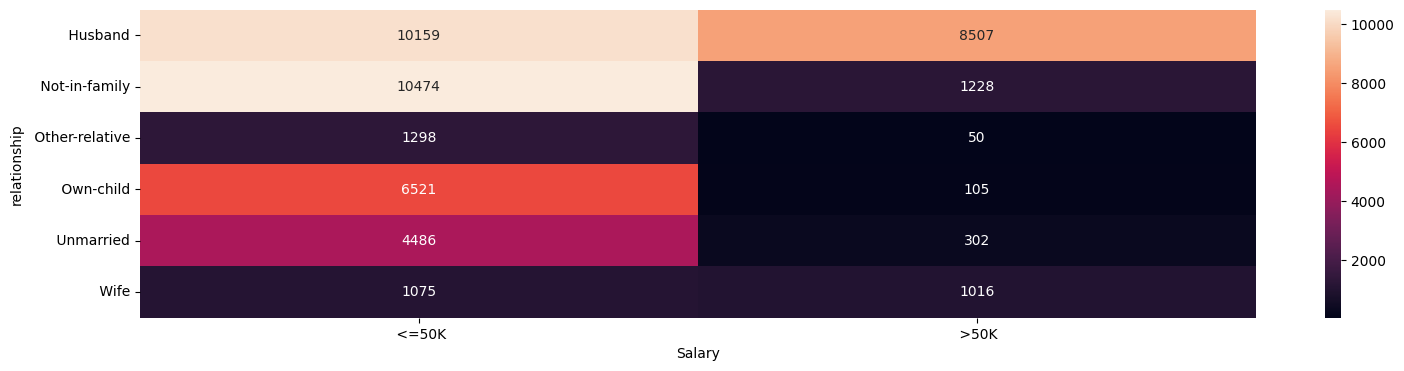

In [59]:
fig= plt.figure(figsize=(18, 4))
sns.heatmap(pd.crosstab(index=raw_data['relationship'], columns=raw_data['Salary']), annot=True, 
            fmt='g')

<Axes: >

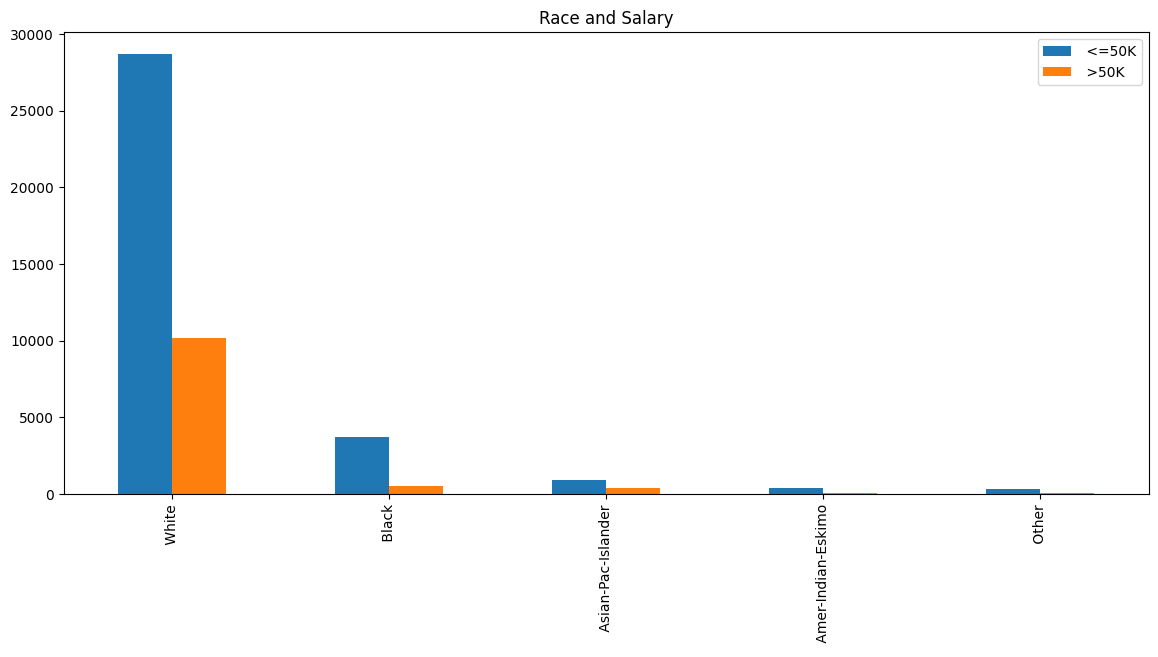

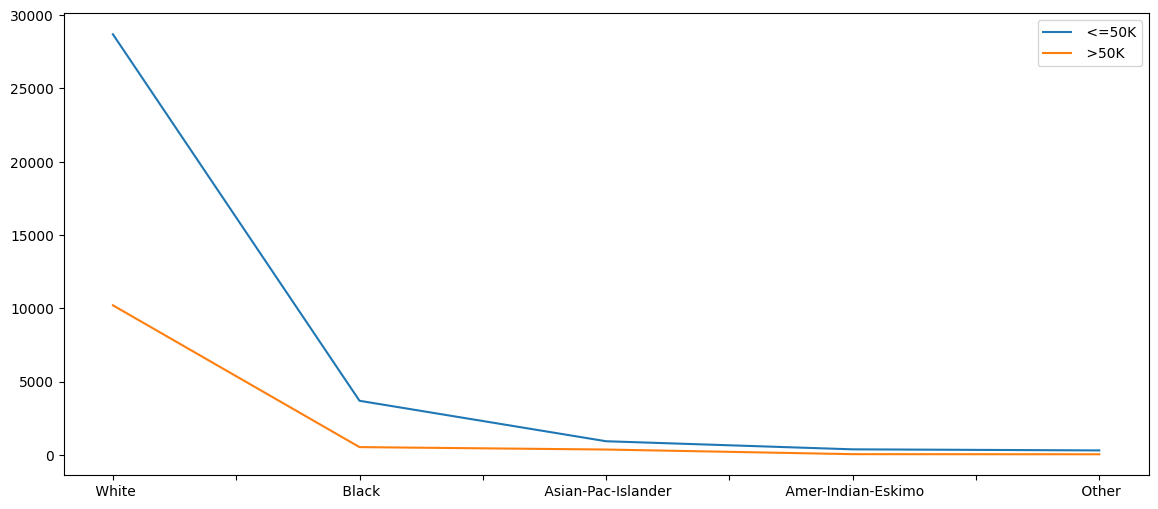

In [60]:
#Race and Salary
j_df = pd.DataFrame()

j_df[' <=50K'] = raw_data[raw_data['Salary'] == ' <=50K']['race'].value_counts()
j_df[' >50K'] = raw_data[raw_data['Salary'] == ' >50K']['race'].value_counts()
j_df.plot.bar(title = 'Race and Salary',figsize=(14,6))
j_df.plot(figsize=(14,6))

<Axes: xlabel='Salary', ylabel='race'>

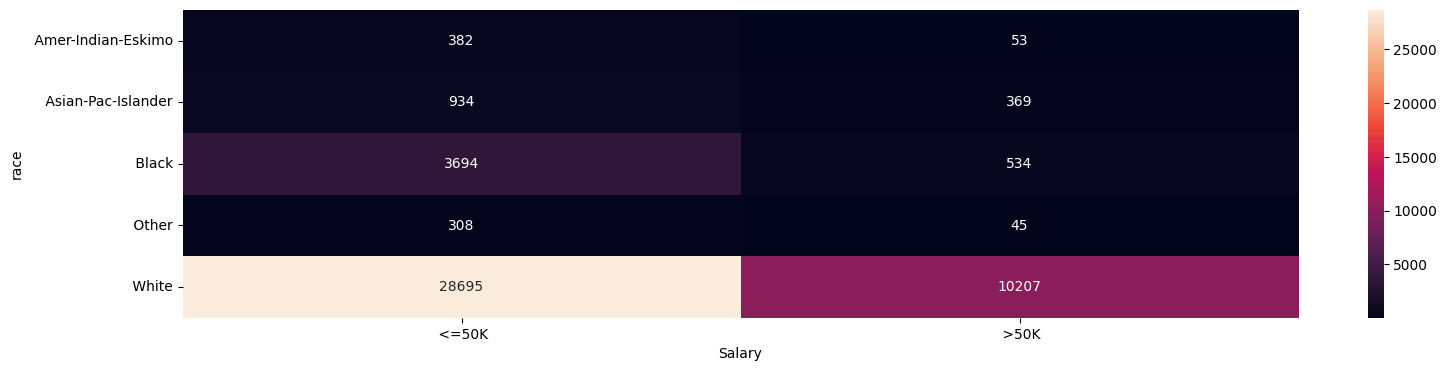

In [61]:
fig= plt.figure(figsize=(18, 4))
sns.heatmap(pd.crosstab(index=raw_data['race'], columns=raw_data['Salary']), annot=True, 
            fmt='g')

<Axes: >

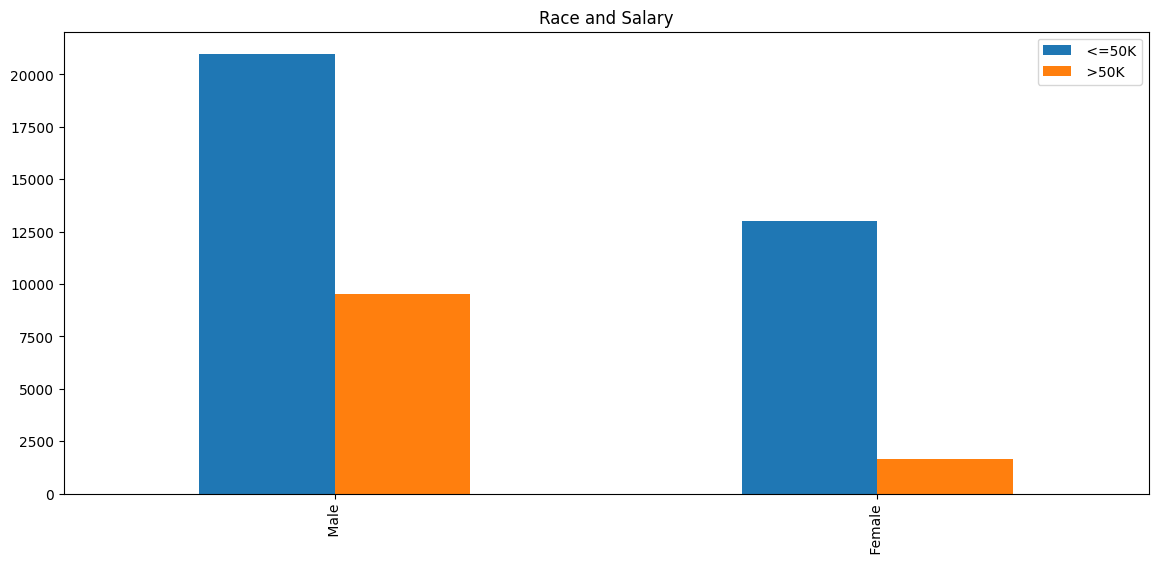

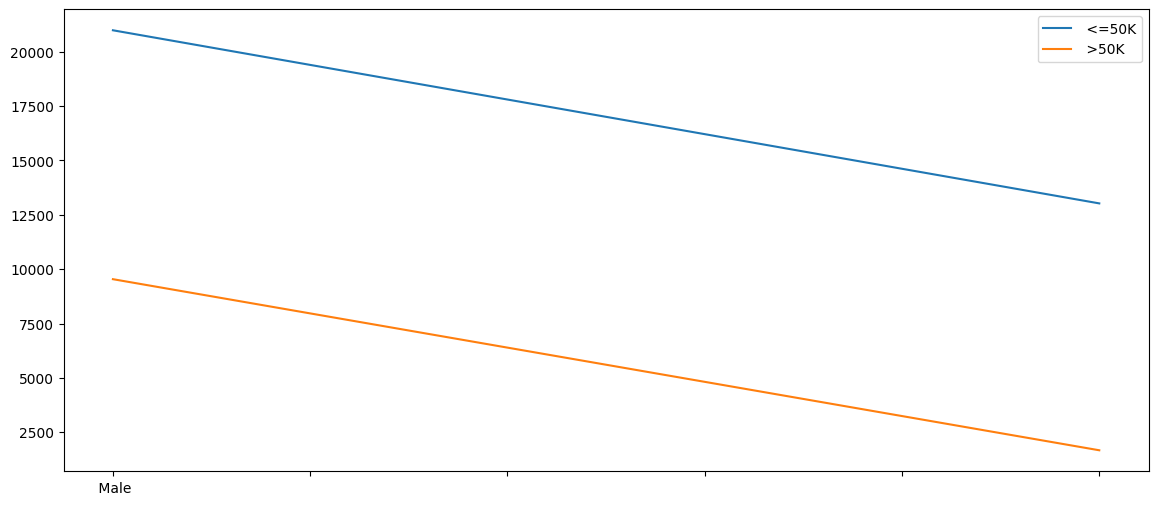

In [62]:
#Sex and Salary
j_df = pd.DataFrame()

j_df[' <=50K'] = raw_data[raw_data['Salary'] == ' <=50K']['sex'].value_counts()
j_df[' >50K'] = raw_data[raw_data['Salary'] == ' >50K']['sex'].value_counts()
j_df.plot.bar(title = 'Race and Salary',figsize=(14,6))
j_df.plot(figsize=(14,6))

<Axes: xlabel='Salary', ylabel='sex'>

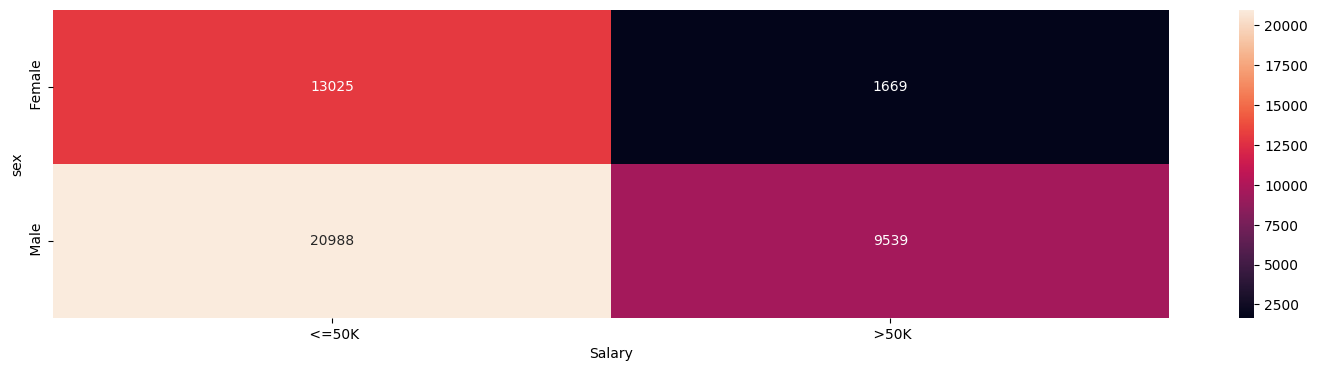

In [63]:
fig= plt.figure(figsize=(18, 4))
sns.heatmap(pd.crosstab(index=raw_data['sex'], columns=raw_data['Salary']), annot=True, 
            fmt='g')

<Axes: >

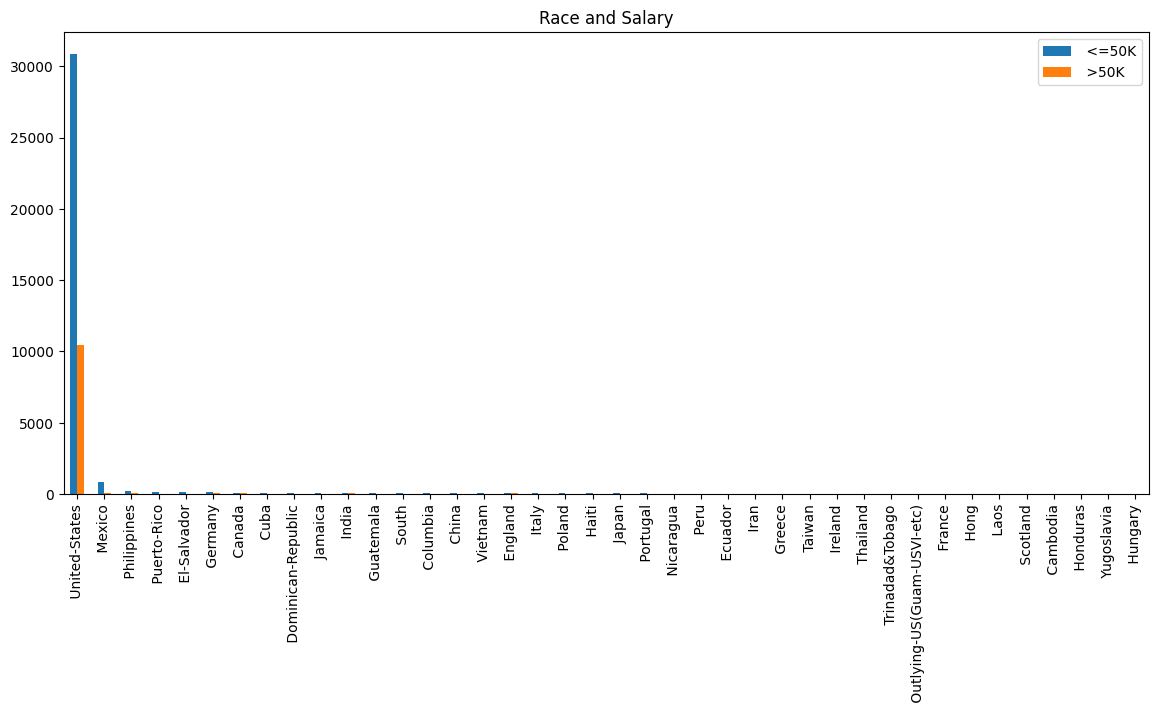

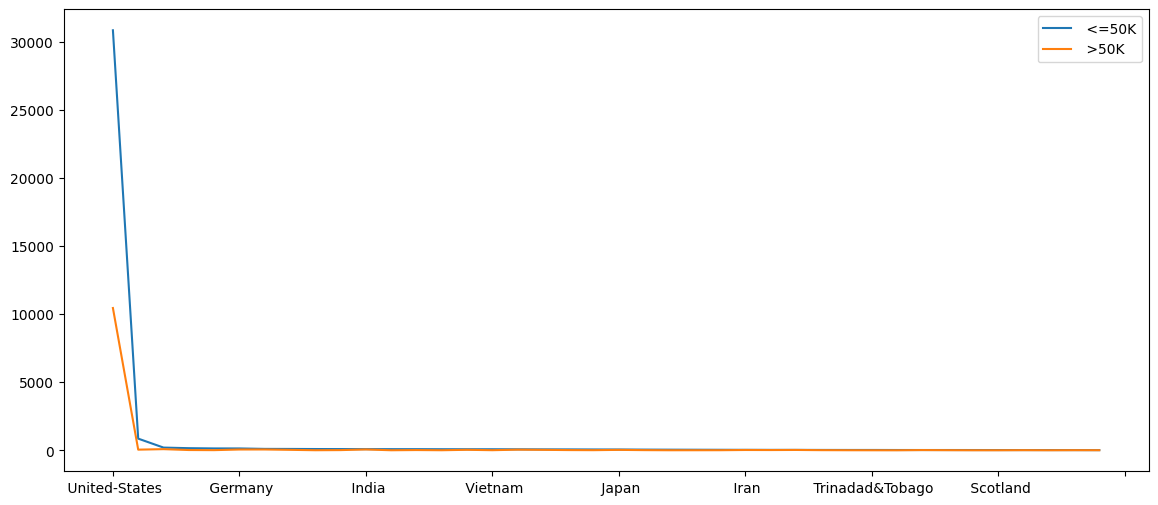

In [64]:
#Native and Salary
j_df = pd.DataFrame()

j_df[' <=50K'] = raw_data[raw_data['Salary'] == ' <=50K']['native'].value_counts()
j_df[' >50K'] = raw_data[raw_data['Salary'] == ' >50K']['native'].value_counts()
j_df.plot.bar(title = 'Race and Salary',figsize=(14,6))
j_df.plot(figsize=(14,6))

<Axes: xlabel='Salary', ylabel='native'>

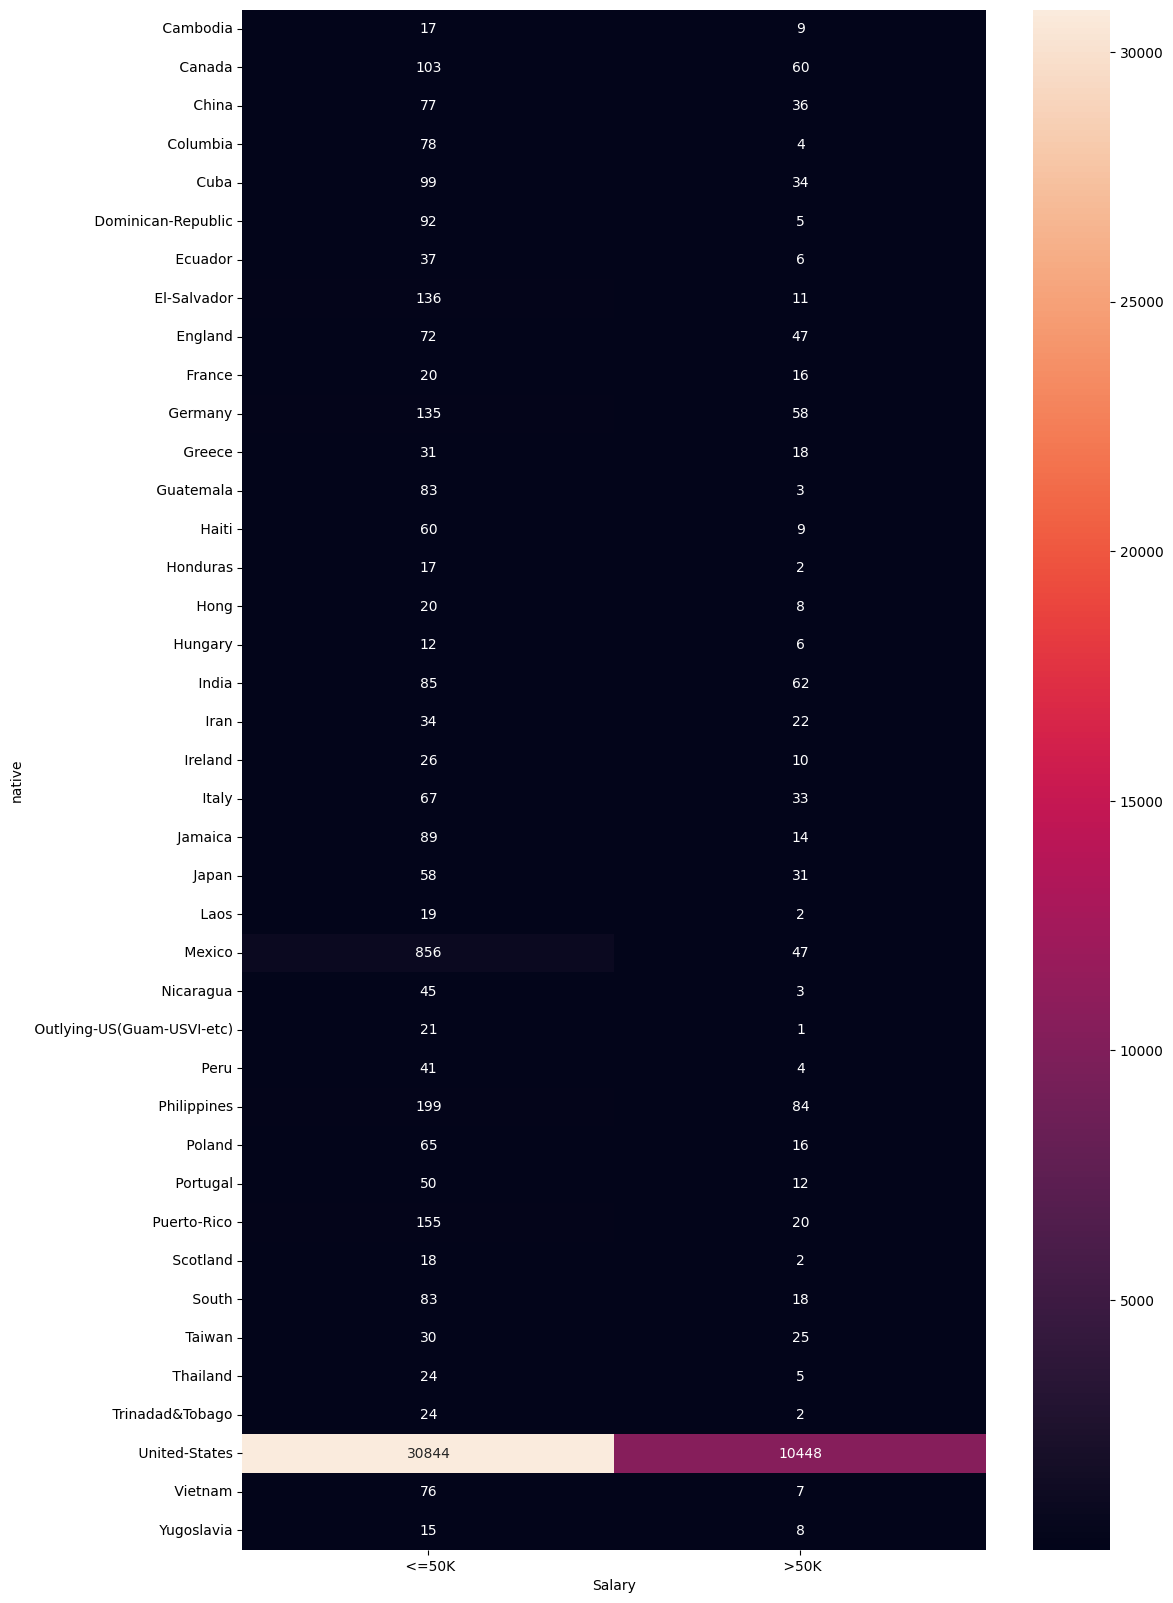

In [65]:
fig= plt.figure(figsize=(12, 20))
sns.heatmap(pd.crosstab(index=raw_data['native'], columns=raw_data['Salary']), annot=True, 
            fmt='g')

# Analyzing Relation by plotting Continuous features with the Target Feature

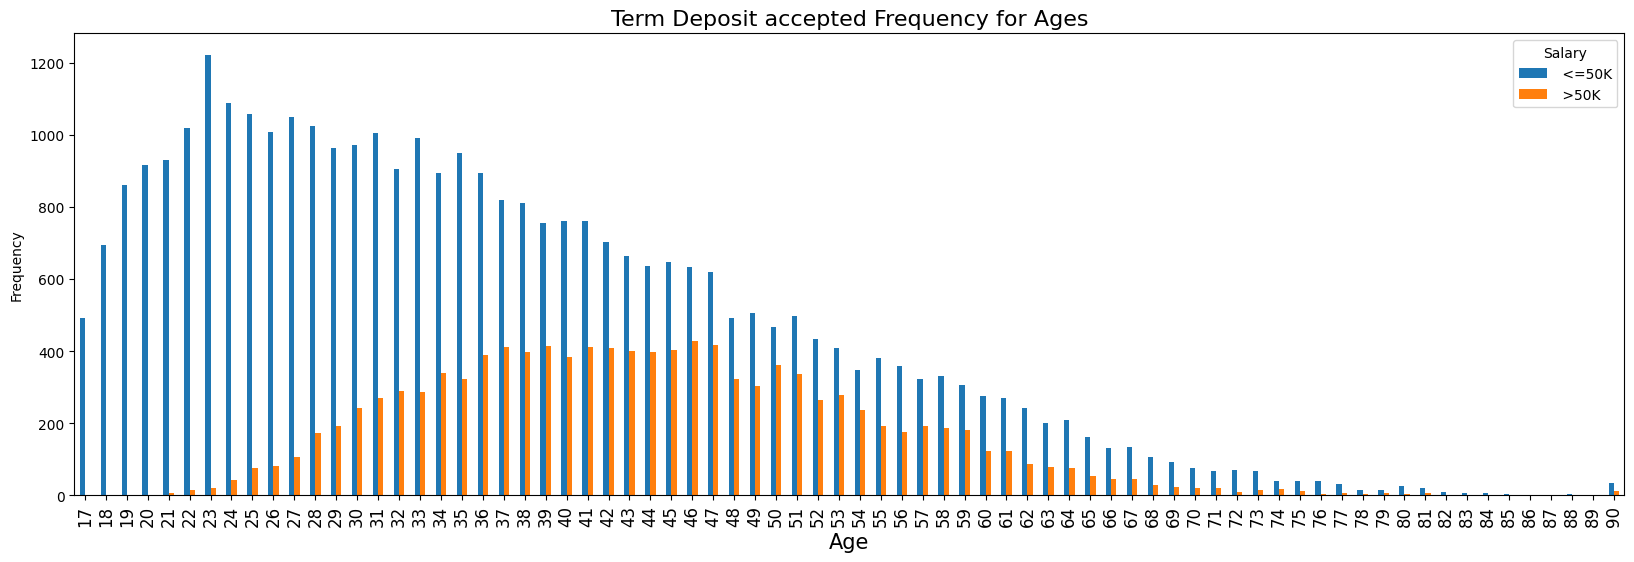

In [66]:
pd.crosstab(raw_data.age,raw_data.Salary).plot(kind="bar",figsize=(20,6))
plt.title('Term Deposit accepted Frequency for Ages', fontsize = 16)
plt.xticks(fontsize = 12)
plt.xlabel('Age', fontsize = 15)
plt.ylabel('Frequency')
plt.show()

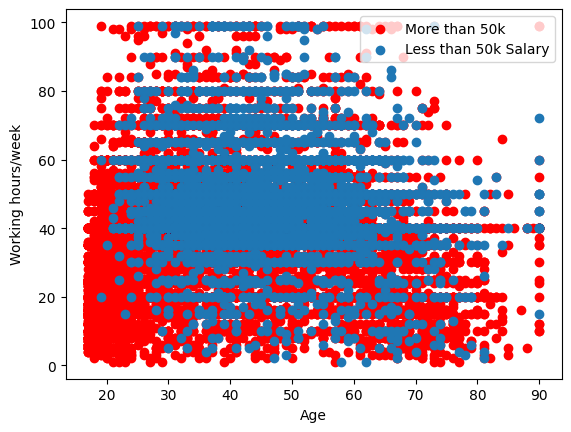

In [67]:
plt.scatter(x=raw_data.age[raw_data.Salary== ' <=50K'], y=raw_data.hoursperweek[(raw_data.Salary== ' <=50K')], c="red")
plt.scatter(x=raw_data.age[raw_data.Salary== ' >50K'], y=raw_data.hoursperweek[(raw_data.Salary== ' >50K')])
plt.legend(["More than 50k", "Less than 50k Salary"])
plt.xlabel("Age")
plt.ylabel("Working hours/week")
plt.show()

# Visualize the Salary and Employee rate by age 

In [68]:
raw_data.age.value_counts()

36    1283
33    1279
31    1274
35    1272
23    1241
      ... 
88       5
85       5
86       1
89       1
87       1
Name: age, Length: 74, dtype: int64

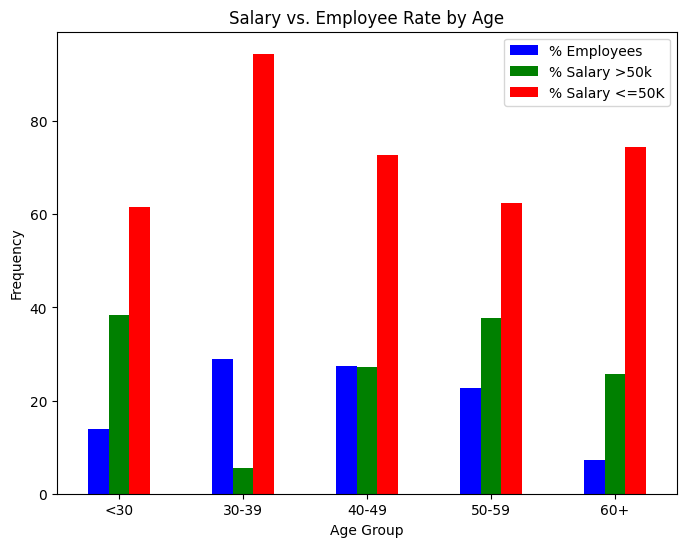

In [69]:
lst = [raw_data]
for column in lst:
    column.loc[column["age"] < 30,  'age_group'] = 20
    column.loc[(column["age"] >= 30) & (column["age"] <= 39), 'age_group'] = 30
    column.loc[(column["age"] >= 40) & (column["age"] <= 49), 'age_group'] = 40
    column.loc[(column["age"] >= 50) & (column["age"] <= 59), 'age_group'] = 50
    column.loc[column["age"] >= 60, 'age_group'] = 60
    
count_age_response_pct = pd.crosstab(raw_data['Salary'],raw_data['age_group']).apply(lambda x: x/x.sum() * 100)
count_age_response_pct = count_age_response_pct.transpose() 

age = pd.DataFrame(raw_data['age_group'].value_counts())
age['% Employees'] = age['age_group']*100/age['age_group'].sum()
age['% Salary >50k'] = count_age_response_pct[' >50K']
age['% Salary <=50K'] = count_age_response_pct[' <=50K']
age.drop('age_group',axis = 1,inplace = True)

age['age'] = [30,40,50,20,60]
age = age.sort_values('age',ascending = True)

plot_age = age[['% Employees','% Salary >50k','% Salary <=50K']].plot(kind = 'bar',
                                              figsize=(8,6), color = ('blue','green','red'))
plt.xlabel('Age Group')
plt.ylabel('Frequency')
plt.xticks(np.arange(5), ('<30', '30-39', '40-49', '50-59', '60+'),rotation = 'horizontal')
plt.title('Salary vs. Employee Rate by Age')
plt.show()

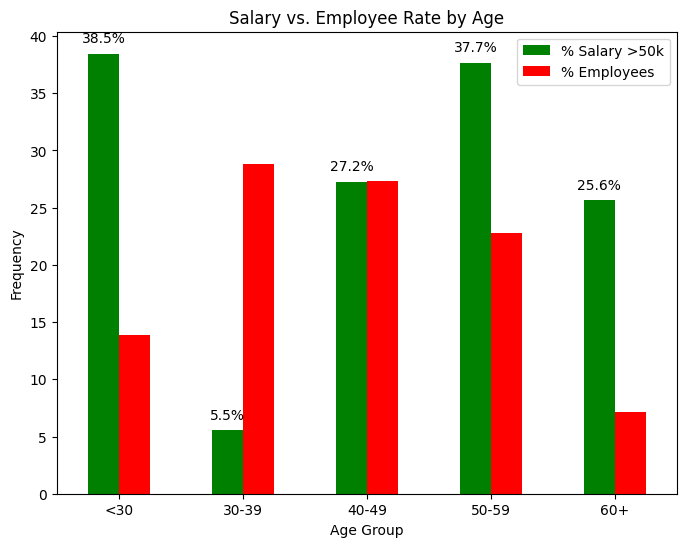

In [70]:
lst = [raw_data]
for column in lst:
    column.loc[column["age"] < 30,  'age_group'] = 20
    column.loc[(column["age"] >= 30) & (column["age"] <= 39), 'age_group'] = 30
    column.loc[(column["age"] >= 40) & (column["age"] <= 49), 'age_group'] = 40
    column.loc[(column["age"] >= 50) & (column["age"] <= 59), 'age_group'] = 50
    column.loc[column["age"] >= 60, 'age_group'] = 60
    
count_age_response_pct = pd.crosstab(raw_data['Salary'],raw_data['age_group']).apply(lambda x: x/x.sum() * 100)
count_age_response_pct = count_age_response_pct.transpose() 

age = pd.DataFrame(raw_data['age_group'].value_counts())
age['% Employees'] = age['age_group']*100/age['age_group'].sum()
age['% Salary >50k'] = count_age_response_pct[' >50K']
age.drop('age_group',axis = 1,inplace = True)

age['age'] = [30,40,50,20,60]
age = age.sort_values('age',ascending = True)

plot_age = age[['% Salary >50k','% Employees']].plot(kind = 'bar',
                                              figsize=(8,6), color = ('green','red'))
plt.xlabel('Age Group')
plt.ylabel('Frequency')
plt.xticks(np.arange(5), ('<30', '30-39', '40-49', '50-59', '60+'),rotation = 'horizontal')
plt.title('Salary vs. Employee Rate by Age')

# label the bar
for rec, label in zip(plot_age.patches,
                      age['% Salary >50k'].round(1).astype(str)):
    plot_age.text(rec.get_x() + rec.get_width()/2, 
                      rec.get_height() + 1, 
                      label+'%',  
                      ha = 'center', 
                      color = 'black')

# Visualize the Salary for >50k by working hours per week 

In [71]:
raw_data.hoursperweek.describe()

count    45221.000000
mean        40.938038
std         12.007640
min          1.000000
25%         40.000000
50%         40.000000
75%         45.000000
max         99.000000
Name: hoursperweek, dtype: float64

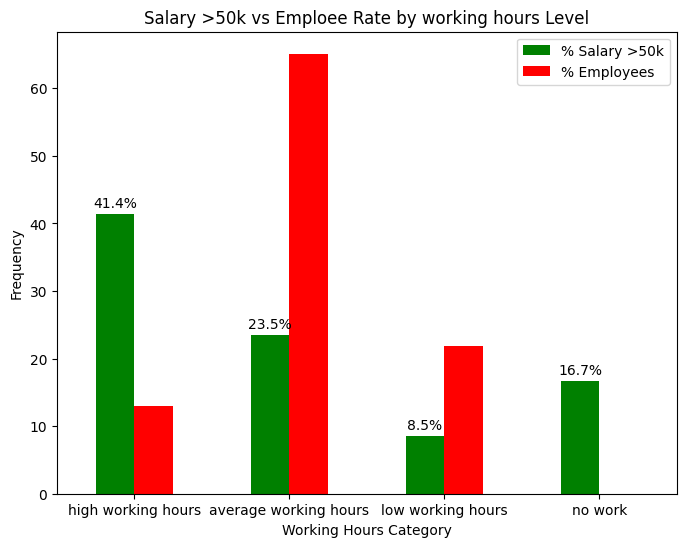

In [72]:
lst = [raw_data]
for column in lst:
    column.loc[column["hoursperweek"] <= 1,  'hour_group'] = 'no work'
    column.loc[(column["hoursperweek"] > 1) & (column["hoursperweek"] <= 35), 'hour_group'] = 'low working hours'
    column.loc[(column["hoursperweek"] > 35) & (column["hoursperweek"] <= 45), 'hour_group'] = 'average working hours'
    column.loc[(column["hoursperweek"] > 50), 'hour_group'] = 'high working hours'
    
count_balance_response_pct = pd.crosstab(raw_data['Salary'],raw_data['hour_group']).apply(lambda x: x/x.sum() * 100)
count_balance_response_pct = count_balance_response_pct.transpose()

bal = pd.DataFrame(raw_data['hour_group'].value_counts())
bal['% Employees'] = bal['hour_group']*100/bal['hour_group'].sum()
bal['% Salary >50k'] = count_balance_response_pct[' >50K']
bal.drop('hour_group',axis = 1,inplace = True)

bal['bal'] = [1,2,0,3]
bal = bal.sort_values('bal',ascending = True)

plot_balance = bal[['% Salary >50k','% Employees']].plot(kind = 'bar',
                                               color = ('green','red'),
                                               figsize = (8,6))

plt.title('Salary >50k vs Emploee Rate by working hours Level')
plt.ylabel('Frequency')
plt.xlabel('Working Hours Category')
plt.xticks(rotation = 'horizontal')

# label the bar
for rec, label in zip(plot_balance.patches,
                      bal['% Salary >50k'].round(1).astype(str)):
    plot_balance.text(rec.get_x() + rec.get_width()/2, 
                      rec.get_height() + 1, 
                      label+'%',  
                      ha = 'center', 
                      color = 'black')

# Visualize the Salary rate by Workclass

In [73]:
count_job_response_pct = pd.crosstab(raw_data['Salary'],raw_data['workclass']).apply(lambda x: x/x.sum() * 100)
count_job_response_pct

workclass   Federal-gov   Local-gov    Private   Self-emp-inc  \
Salary                                                          
 <=50K        60.953058   70.483871  78.229148      44.592953   
 >50K         39.046942   29.516129  21.770852      55.407047   

workclass   Self-emp-not-inc   State-gov   Without-pay  
Salary                                                  
 <=50K             72.102213    73.27852      90.47619  
 >50K              27.897787    26.72148       9.52381

In [74]:
count_job_response_pct = count_job_response_pct.transpose()
count_job_response_pct

Salary                 <=50K       >50K
workclass                              
 Federal-gov       60.953058  39.046942
 Local-gov         70.483871  29.516129
 Private           78.229148  21.770852
 Self-emp-inc      44.592953  55.407047
 Self-emp-not-inc  72.102213  27.897787
 State-gov         73.278520  26.721480
 Without-pay       90.476190   9.523810

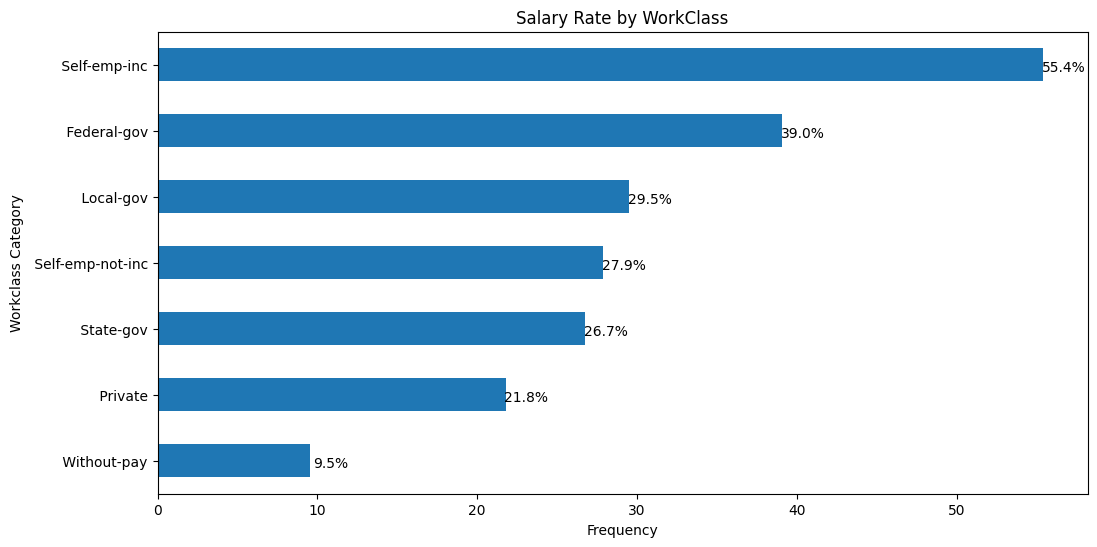

In [75]:
plot_job = count_job_response_pct[' >50K'].sort_values(ascending = True).plot(kind ='barh',
                                                                           figsize = (12,6))
                                                                               
plt.title('Salary Rate by WorkClass')
plt.xlabel('Frequency')
plt.ylabel('Workclass Category')

# Label each bar
for rec, label in zip(plot_job.patches,
                      count_job_response_pct[' >50K'].sort_values(ascending = True).round(1).astype(str)):
    plot_job.text(rec.get_width()+1.3, 
                  rec.get_y()+ rec.get_height()-0.4, 
                  label+'%', 
                  ha = 'center', 
                  va='bottom')

# Visualize the Salary rate by Education

In [76]:
count_job_response_pct = pd.crosstab(raw_data['Salary'],raw_data['education']).apply(lambda x: x/x.sum() * 100)
count_job_response_pct

education       10th       11th      12th    1st-4th    5th-6th    7th-8th  \
Salary                                                                       
 <=50K     93.295176  94.502779  92.54766  96.396396  95.100223  93.317132   
 >50K       6.704824   5.497221   7.45234   3.603604   4.899777   6.682868   

education        9th   Assoc-acdm   Assoc-voc   Bachelors   Doctorate  \
Salary                                                                  
 <=50K     94.378698    73.589914   74.272588   58.018494   26.654412   
 >50K       5.621302    26.410086   25.727412   41.981506   73.345588   

education    HS-grad    Masters   Preschool   Prof-school   Some-college  
Salary                                                                    
 <=50K     83.656903  44.590294   98.611111     24.585987      79.894928  
 >50K      16.343097  55.409706    1.388889     75.414013      20.105072

In [77]:
count_job_response_pct = count_job_response_pct.transpose()
count_job_response_pct

Salary             <=50K       >50K
education                          
 10th          93.295176   6.704824
 11th          94.502779   5.497221
 12th          92.547660   7.452340
 1st-4th       96.396396   3.603604
 5th-6th       95.100223   4.899777
 7th-8th       93.317132   6.682868
 9th           94.378698   5.621302
 Assoc-acdm    73.589914  26.410086
 Assoc-voc     74.272588  25.727412
 Bachelors     58.018494  41.981506
 Doctorate     26.654412  73.345588
 HS-grad       83.656903  16.343097
 Masters       44.590294  55.409706
 Preschool     98.611111   1.388889
 Prof-school   24.585987  75.414013
 Some-college  79.894928  20.105072

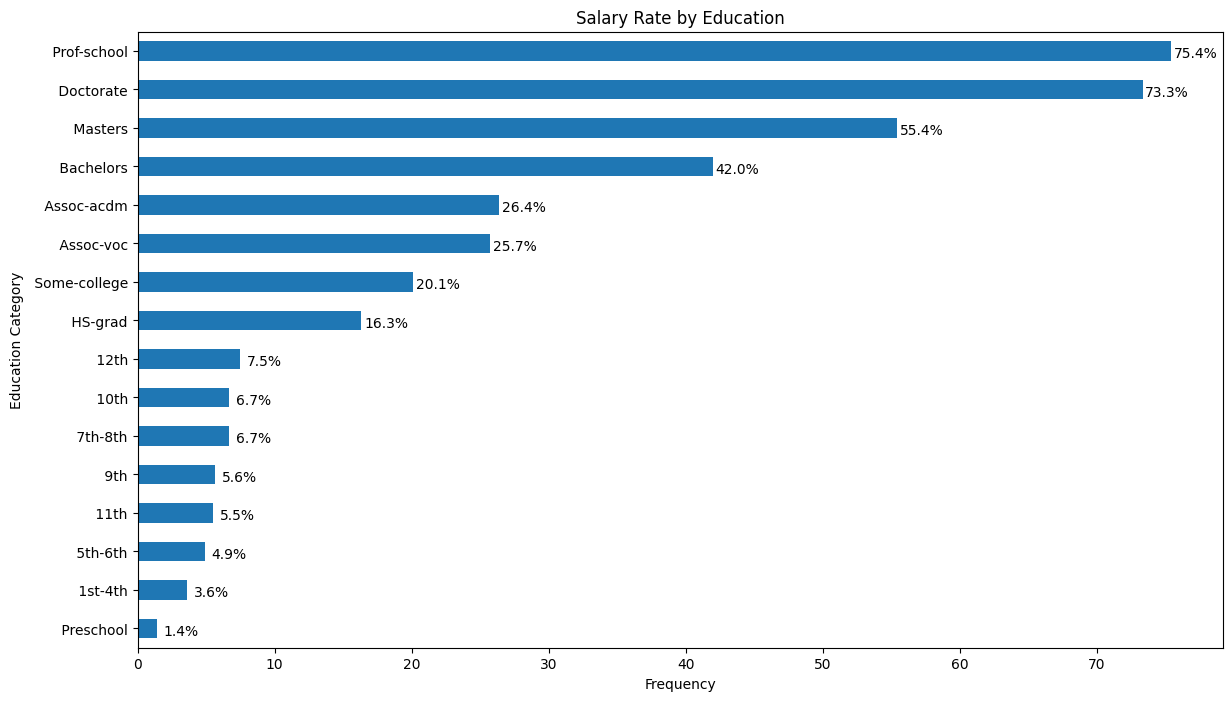

In [78]:
plot_job = count_job_response_pct[' >50K'].sort_values(ascending = True).plot(kind ='barh',
                                                                           figsize = (14,8))
                                                                               
plt.title('Salary Rate by Education')
plt.xlabel('Frequency')
plt.ylabel('Education Category')

# Label each bar
for rec, label in zip(plot_job.patches,
                      count_job_response_pct[' >50K'].sort_values(ascending = True).round(1).astype(str)):
    plot_job.text(rec.get_width()+1.8, 
                  rec.get_y()+ rec.get_height()-0.5, 
                  label+'%', 
                  ha = 'center', 
                  va='bottom')

# Clean the dataset 

# Data Pre-Processing

In [79]:
raw_data.head()

index  age          workclass   education  educationno  \
0      0   39          State-gov   Bachelors           13   
1      1   50   Self-emp-not-inc   Bachelors           13   
2      2   38            Private     HS-grad            9   
3      3   53            Private        11th            7   
4      4   28            Private   Bachelors           13   

         maritalstatus          occupation    relationship    race      sex  \
0        Never-married        Adm-clerical   Not-in-family   White     Male   
1   Married-civ-spouse     Exec-managerial         Husband   White     Male   
2             Divorced   Handlers-cleaners   Not-in-family   White     Male   
3   Married-civ-spouse   Handlers-cleaners         Husband   Black     Male   
4   Married-civ-spouse      Prof-specialty            Wife   Black   Female   

   capitalgain  capitalloss  hoursperweek          native  Salary  age_group  \
0         2174            0            40   United-States   <=50K       30.0   
1            0            0            13   United-States   <=50K       50.0   
2            0            0            40   United-States   <=50K       30.0   
3            0            0            40   United-States   <=50K       50.0   
4            0            0            40            Cuba   <=50K       20.0   

              hour_group  
0  average working hours  
1      low working hours  
2  average working hours  
3  average working hours  
4  average working hours

In [80]:
data_ = raw_data.copy()
data_.drop('Salary',axis=1, inplace =True)
data_ = pd.get_dummies(data_.iloc[:,:])
data_.head()

index  age  educationno  capitalgain  capitalloss  hoursperweek  age_group  \
0      0   39           13         2174            0            40       30.0   
1      1   50           13            0            0            13       50.0   
2      2   38            9            0            0            40       30.0   
3      3   53            7            0            0            40       50.0   
4      4   28           13            0            0            40       20.0   

   workclass_ Federal-gov  workclass_ Local-gov  workclass_ Private  ...  \
0                       0                     0                   0  ...   
1                       0                     0                   0  ...   
2                       0                     0                   1  ...   
3                       0                     0                   1  ...   
4                       0                     0                   1  ...   

   native_ Taiwan  native_ Thailand  native_ Trinadad&Tobago  \
0               0                 0                        0   
1               0                 0                        0   
2               0                 0                        0   
3               0                 0                        0   
4               0                 0                        0   

   native_ United-States  native_ Vietnam  native_ Yugoslavia  \
0                      1                0                   0   
1                      1                0                   0   
2                      1                0                   0   
3                      1                0                   0   
4                      0                0                   0   

   hour_group_average working hours  hour_group_high working hours  \
0                                 1                              0   
1                                 0                              0   
2                                 1                              0   
3                                 1                              0   
4                                 1                              0   

   hour_group_low working hours  hour_group_no work  
0                             0                   0  
1                             1                   0  
2                             0                   0  
3                             0                   0  
4                             0                   0  

[5 rows x 108 columns]

In [81]:
data_['Salary'] = raw_data.Salary
data_.head()

index  age  educationno  capitalgain  capitalloss  hoursperweek  age_group  \
0      0   39           13         2174            0            40       30.0   
1      1   50           13            0            0            13       50.0   
2      2   38            9            0            0            40       30.0   
3      3   53            7            0            0            40       50.0   
4      4   28           13            0            0            40       20.0   

   workclass_ Federal-gov  workclass_ Local-gov  workclass_ Private  ...  \
0                       0                     0                   0  ...   
1                       0                     0                   0  ...   
2                       0                     0                   1  ...   
3                       0                     0                   1  ...   
4                       0                     0                   1  ...   

   native_ Thailand  native_ Trinadad&Tobago  native_ United-States  \
0                 0                        0                      1   
1                 0                        0                      1   
2                 0                        0                      1   
3                 0                        0                      1   
4                 0                        0                      0   

   native_ Vietnam  native_ Yugoslavia  hour_group_average working hours  \
0                0                   0                                 1   
1                0                   0                                 0   
2                0                   0                                 1   
3                0                   0                                 1   
4                0                   0                                 1   

   hour_group_high working hours  hour_group_low working hours  \
0                              0                             0   
1                              0                             1   
2                              0                             0   
3                              0                             0   
4                              0                             0   

   hour_group_no work  Salary  
0                   0   <=50K  
1                   0   <=50K  
2                   0   <=50K  
3                   0   <=50K  
4                   0   <=50K  

[5 rows x 109 columns]

In [82]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
le = LabelEncoder()
le.fit(data_["Salary"])
data_["Salary"]=le.transform(data_["Salary"])
data_.head()

index  age  educationno  capitalgain  capitalloss  hoursperweek  age_group  \
0      0   39           13         2174            0            40       30.0   
1      1   50           13            0            0            13       50.0   
2      2   38            9            0            0            40       30.0   
3      3   53            7            0            0            40       50.0   
4      4   28           13            0            0            40       20.0   

   workclass_ Federal-gov  workclass_ Local-gov  workclass_ Private  ...  \
0                       0                     0                   0  ...   
1                       0                     0                   0  ...   
2                       0                     0                   1  ...   
3                       0                     0                   1  ...   
4                       0                     0                   1  ...   

   native_ Thailand  native_ Trinadad&Tobago  native_ United-States  \
0                 0                        0                      1   
1                 0                        0                      1   
2                 0                        0                      1   
3                 0                        0                      1   
4                 0                        0                      0   

   native_ Vietnam  native_ Yugoslavia  hour_group_average working hours  \
0                0                   0                                 1   
1                0                   0                                 0   
2                0                   0                                 1   
3                0                   0                                 1   
4                0                   0                                 1   

   hour_group_high working hours  hour_group_low working hours  \
0                              0                             0   
1                              0                             1   
2                              0                             0   
3                              0                             0   
4                              0                             0   

   hour_group_no work  Salary  
0                   0       0  
1                   0       0  
2                   0       0  
3                   0       0  
4                   0       0  

[5 rows x 109 columns]

# Label Encoding Technique

In [83]:
# Label Encoding of categrical variables
from sklearn import preprocessing
 
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()

df= raw_data.copy()
# Encode labels in column 'species'.
df["education"]=label_encoder.fit_transform(df["education"])
df["workclass"]=label_encoder.fit_transform(df["workclass"])
df["maritalstatus"]=label_encoder.fit_transform(df["maritalstatus"])
df["sex"]=label_encoder.fit_transform(df["sex"])
df["race"]=label_encoder.fit_transform(df["race"])
df["occupation"]=label_encoder.fit_transform(df["occupation"])
df["relationship"]=label_encoder.fit_transform(df["relationship"])
df["native"]=label_encoder.fit_transform(df["native"])
df['Salary'] = np.where(df['Salary'].str.contains(" >50K"), 1, 0)
df["hour_group"]=label_encoder.fit_transform(df["hour_group"])
df.head(10)

index  age  workclass  education  educationno  maritalstatus  occupation  \
0      0   39          5          9           13              4           0   
1      1   50          4          9           13              2           3   
2      2   38          2         11            9              0           5   
3      3   53          2          1            7              2           5   
4      4   28          2          9           13              2           9   
5      5   37          2         12           14              2           3   
6      6   49          2          6            5              3           7   
7      7   52          4         11            9              2           3   
8      8   31          2         12           14              4           9   
9      9   42          2          9           13              2           3   

   relationship  race  sex  capitalgain  capitalloss  hoursperweek  native  \
0             1     4    1         2174            0            40      37   
1             0     4    1            0            0            13      37   
2             1     4    1            0            0            40      37   
3             0     2    1            0            0            40      37   
4             5     2    0            0            0            40       4   
5             5     4    0            0            0            40      37   
6             1     2    0            0            0            16      21   
7             0     4    1            0            0            45      37   
8             1     4    0        14084            0            50      37   
9             0     4    1         5178            0            40      37   

   Salary  age_group  hour_group  
0       0       30.0           0  
1       0       50.0           2  
2       0       30.0           0  
3       0       50.0           0  
4       0       20.0           0  
5       0       30.0           0  
6       0       40.0           2  
7       1       50.0           0  
8       1       30.0           4  
9       1       40.0           0

# Test Train Split With Imbalanced Dataset


In [84]:
x = df.drop('Salary',axis=1)
y = df['Salary']

In [85]:
y.unique()

array([0, 1])

In [86]:
# Create StratifiedKFold object.
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)

# enumerate the splits and summarize the distributions
for train_ix, test_ix in skf.split(x, y):
# select rows
    train_X, test_X = x.iloc[train_ix], x.loc[test_ix]
    train_y, test_y = y.iloc[train_ix], y.iloc[test_ix]
# summarize train and test composition
counter_train = Counter(train_y)
counter_test = Counter(test_y)
print('Training Data',counter_train,'Testing Data',counter_test)

Training Data Counter({0: 30612, 1: 10087}) Testing Data Counter({0: 3401, 1: 1121})


In [87]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=1,stratify=y)

In [88]:
# summarize train and test composition
counter_train = Counter(y_train)
counter_test = Counter(y_test)
print('Training Data',counter_train,'Testing Data',counter_test)

Training Data Counter({0: 23809, 1: 7845}) Testing Data Counter({0: 10204, 1: 3363})


In [89]:
print("Shape of X_train: ",x_train.shape)
print("Shape of X_test: ", x_test.shape)
print("Shape of y_train: ",y_train.shape)
print("Shape of y_test",y_test.shape)

Shape of X_train:  (31654, 16)
Shape of X_test:  (13567, 16)
Shape of y_train:  (31654,)
Shape of y_test (13567,)


# Grid search using Stratified Kfold Splits on Imbalanced Dataset

In [90]:
def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        pred = clf.predict(X_train)
        clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")
        
    elif train==False:
        pred = clf.predict(X_test)
        clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
        print("Test Result:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")

In [91]:
train_X.head()

index  age  workclass  education  educationno  maritalstatus  occupation  \
0      0   39          5          9           13              4           0   
2      2   38          2         11            9              0           5   
3      3   53          2          1            7              2           5   
4      4   28          2          9           13              2           9   
5      5   37          2         12           14              2           3   

   relationship  race  sex  capitalgain  capitalloss  hoursperweek  native  \
0             1     4    1         2174            0            40      37   
2             1     4    1            0            0            40      37   
3             0     2    1            0            0            40      37   
4             5     2    0            0            0            40       4   
5             5     4    0            0            0            40      37   

   age_group  hour_group  
0       30.0           0  
2       30.0           0  
3       50.0           0  
4       20.0           0  
5       30.0           0

In [92]:
from sklearn.naive_bayes import MultinomialNB

rf_clf = MultinomialNB()
rf_clf.fit(train_X, train_y)

print_score(rf_clf, train_X, train_y, test_X, test_y, train=True)
print_score(rf_clf, train_X, train_y, test_X, test_y, train=False)

Train Result:
Accuracy Score: 77.67%
_______________________________________________
CLASSIFICATION REPORT:
                      0             1  accuracy     macro avg  weighted avg
precision      0.792398      0.628307  0.776702      0.710353      0.751729
recall         0.952731      0.242490  0.776702      0.597611      0.776702
f1-score       0.865199      0.349928  0.776702      0.607564      0.737492
support    30612.000000  10087.000000  0.776702  40699.000000  40699.000000
_______________________________________________
Confusion Matrix: 
 [[29165  1447]
 [ 7641  2446]]

Test Result:
Accuracy Score: 78.02%
_______________________________________________
CLASSIFICATION REPORT:
                     0            1  accuracy    macro avg  weighted avg
precision     0.795482     0.641425  0.780186     0.718454      0.757292
recall        0.952661     0.256913  0.780186     0.604787      0.780186
f1-score      0.867006     0.366879  0.780186     0.616942      0.743025
support    34

In [93]:
from sklearn.naive_bayes import GaussianNB

rf_clf = GaussianNB()
rf_clf.fit(train_X, train_y)

print_score(rf_clf, train_X, train_y, test_X, test_y, train=True)
print_score(rf_clf, train_X, train_y, test_X, test_y, train=False)

Train Result:
Accuracy Score: 80.10%
_______________________________________________
CLASSIFICATION REPORT:
                      0             1  accuracy     macro avg  weighted avg
precision      0.818079      0.687194  0.801002      0.752637      0.785640
recall         0.945740      0.361753  0.801002      0.653746      0.801002
f1-score       0.877290      0.473988  0.801002      0.675639      0.777334
support    30612.000000  10087.000000  0.801002  40699.000000  40699.000000
_______________________________________________
Confusion Matrix: 
 [[28951  1661]
 [ 6438  3649]]

Test Result:
Accuracy Score: 81.00%
_______________________________________________
CLASSIFICATION REPORT:
                     0            1  accuracy    macro avg  weighted avg
precision     0.824898     0.714754   0.81004     0.769826      0.797593
recall        0.948839     0.388938   0.81004     0.668889      0.810040
f1-score      0.882538     0.503755   0.81004     0.693147      0.788638
support    34

In [94]:
from sklearn.naive_bayes import CategoricalNB

rf_clf = CategoricalNB()
rf_clf.fit(train_X, train_y)

print_score(rf_clf, train_X, train_y, test_X, test_y, train=True)
print_score(rf_clf, train_X, train_y, test_X, test_y, train=False)

Train Result:
Accuracy Score: 87.91%
_______________________________________________
CLASSIFICATION REPORT:
                      0             1  accuracy     macro avg  weighted avg
precision      0.928517      0.741045  0.879137      0.834781      0.882053
recall         0.909317      0.787548  0.879137      0.848432      0.879137
f1-score       0.918816      0.763589  0.879137      0.841203      0.880344
support    30612.000000  10087.000000  0.879137  40699.000000  40699.000000
_______________________________________________
Confusion Matrix: 
 [[27836  2776]
 [ 2143  7944]]

Test Result:
Accuracy Score: 84.37%
_______________________________________________
CLASSIFICATION REPORT:
                     0            1  accuracy    macro avg  weighted avg
precision     0.906457     0.671358  0.843653     0.788908      0.848176
recall        0.883270     0.723461  0.843653     0.803365      0.843653
f1-score      0.894713     0.696436  0.843653     0.795575      0.845561
support    34

# Grid search using Train Test Splits Stratifying Target feature on Imbalanced Dataset

In [95]:
from sklearn.naive_bayes import MultinomialNB

rf_clf = MultinomialNB()
rf_clf.fit(x_train, y_train)

print_score(rf_clf, x_train, y_train, x_test, y_test, train=True)
print_score(rf_clf, x_train, y_train, x_test, y_test, train=False)

Train Result:
Accuracy Score: 77.72%
_______________________________________________
CLASSIFICATION REPORT:
                      0            1  accuracy     macro avg  weighted avg
precision      0.792801     0.630471  0.777216      0.711636      0.752570
recall         0.952833     0.244232  0.777216      0.598532      0.777216
f1-score       0.865481     0.352076  0.777216      0.608779      0.738241
support    23809.000000  7845.000000  0.777216  31654.000000  31654.000000
_______________________________________________
Confusion Matrix: 
 [[22686  1123]
 [ 5929  1916]]

Test Result:
Accuracy Score: 77.67%
_______________________________________________
CLASSIFICATION REPORT:
                      0            1  accuracy     macro avg  weighted avg
precision      0.792165     0.629658  0.776738      0.710912      0.751883
recall         0.953254     0.241154  0.776738      0.597204      0.776738
f1-score       0.865276     0.348742  0.776738      0.607009      0.737237
support   

In [96]:
from sklearn.naive_bayes import GaussianNB

rf_clf = GaussianNB()
rf_clf.fit(x_train, y_train)

print_score(rf_clf, x_train, y_train, x_test, y_test, train=True)
print_score(rf_clf, x_train, y_train, x_test, y_test, train=False)

Train Result:
Accuracy Score: 80.17%
_______________________________________________
CLASSIFICATION REPORT:
                      0            1  accuracy     macro avg  weighted avg
precision      0.819135     0.687291    0.8017      0.753213      0.786459
recall         0.945021     0.366730    0.8017      0.655876      0.801700
f1-score       0.877586     0.478264    0.8017      0.677925      0.778620
support    23809.000000  7845.000000    0.8017  31654.000000  31654.000000
_______________________________________________
Confusion Matrix: 
 [[22500  1309]
 [ 4968  2877]]

Test Result:
Accuracy Score: 80.32%
_______________________________________________
CLASSIFICATION REPORT:
                      0            1  accuracy     macro avg  weighted avg
precision      0.819075     0.696763  0.803199      0.757919      0.788756
recall         0.947668     0.364853  0.803199      0.656260      0.803199
f1-score       0.878692     0.478923  0.803199      0.678807      0.779596
support   

In [97]:
from sklearn.naive_bayes import CategoricalNB

rf_clf = CategoricalNB(alpha=1.0)
rf_clf.fit(x_train, y_train)

print_score(rf_clf, x_train, y_train, x_test, y_test, train=True)
print_score(rf_clf, x_train, y_train, x_test, y_test, train=False)

Train Result:
Accuracy Score: 88.11%
_______________________________________________
CLASSIFICATION REPORT:
                      0            1  accuracy     macro avg  weighted avg
precision      0.925997     0.750984  0.881058      0.838491      0.882622
recall         0.914990     0.778075  0.881058      0.846533      0.881058
f1-score       0.920461     0.764290  0.881058      0.842375      0.881756
support    23809.000000  7845.000000  0.881058  31654.000000  31654.000000
_______________________________________________
Confusion Matrix: 
 [[21785  2024]
 [ 1741  6104]]

Test Result:
Accuracy Score: 84.63%
_______________________________________________
CLASSIFICATION REPORT:
                      0            1  accuracy     macro avg  weighted avg
precision      0.904131     0.681431  0.846318      0.792781      0.848928
recall         0.890043     0.713649  0.846318      0.801846      0.846318
f1-score       0.897032     0.697168  0.846318      0.797100      0.847489
support   

### In both the condition, due to imbalanced dataset our results are getting biased towards the majority. The model is correctly classifying all the majority classes yet fails to classify the minority classes. Hence, we need to use some kind of oversampling techniques to balance the dataset.As Categorical Naive Bayes is scoring better result than other models we are going to use this model for final model building

# Handling imbalance data using SMOTE based techniques

In [98]:
x = df.drop(['Salary'], axis=1)
y = df['Salary']

x_train, x_test, y_train, y_test = train_test_split( x, y, test_size=0.30, random_state=0,stratify=y)

In [99]:
print("Shape of X_train: ",x_train.shape)
print("Shape of X_test: ", x_test.shape)
print("Shape of y_train: ",y_train.shape)
print("Shape of y_test",y_test.shape)

Shape of X_train:  (31654, 16)
Shape of X_test:  (13567, 16)
Shape of y_train:  (31654,)
Shape of y_test (13567,)


# SMOTE Oversampling technique 

In [100]:
counter = Counter(y_train)
print('Before',counter)
# oversampling the train dataset using SMOTE
smt = SMOTE()
x_train_sm, y_train_sm = smt.fit_resample(x_train, y_train)

counter = Counter(y_train_sm)
print('After',counter)

Before Counter({0: 23809, 1: 7845})


After Counter({0: 23809, 1: 23809})


# ADASYN: Adaptive Synthetic Sampling Approach

In [101]:
counter = Counter(y_train)
print('Before',counter)
# oversampling the train dataset using ADASYN
ada = ADASYN(random_state=130)
x_train_ada, y_train_ada = ada.fit_resample(x_train, y_train)

counter = Counter(y_train_ada)
print('After',counter)

Before Counter({0: 23809, 1: 7845})
After Counter({0: 23809, 1: 23446})


# Hybridization: SMOTE + Tomek Links

In [102]:
counter = Counter(y_train)
print('Before',counter)
# oversampling the train dataset using SMOTE + Tomek
smtom = SMOTETomek(random_state=139)
x_train_smtom, y_train_smtom = smtom.fit_resample(x_train, y_train)

counter = Counter(y_train_smtom)
print('After',counter)

Before Counter({0: 23809, 1: 7845})
After Counter({0: 23067, 1: 23067})


# Hybridization: SMOTE + ENN

In [103]:
counter = Counter(y_train)
print('Before',counter)
#oversampling the train dataset using SMOTE + ENN
smenn = SMOTEENN()
x_train_smenn, y_train_smenn = smenn.fit_resample(x_train, y_train)

counter = Counter(y_train_smenn)
print('After',counter)

Before Counter({0: 23809, 1: 7845})
After Counter({1: 17754, 0: 12137})


# Performance Analysis after Resampling

In [104]:
sampled_data = {
    'ACTUAL':[x_train, y_train],
    'SMOTE':[x_train_sm, y_train_sm],
    'ADASYN':[x_train_ada, y_train_ada],
    'SMOTE_TOMEK':[x_train_smtom, y_train_smtom],
    'SMOTE_ENN':[x_train_smenn, y_train_smenn]
}

In [105]:
def test_eval(clf_model, X_test, y_test, algo=None, sampling=None):
    # Test set prediction
    y_prob=clf_model.predict_proba(X_test)
    y_pred=clf_model.predict(X_test)

    print('Confusion Matrix')
    print('='*60)
    #plot_confusion_matrix(clf_model, X_test, y_test)  
    #plt.show() 
    print(confusion_matrix(y_test,y_pred),"\n")
    print('Classification Report')
    print('='*60)
    print(classification_report(y_test,y_pred),"\n")
    print('AUC-ROC')
    print('='*60)
    print(roc_auc_score(y_test, y_prob[:,1]))
    
    #x = roc_auc_score(y_test, y_prob[:,1])
    f1 = f1_score(y_test, y_pred, average='binary')
    recall = recall_score(y_test, y_pred, average='binary')
    precision = precision_score(y_test, y_pred, average='binary')
          
    
    return algo,precision,recall,f1,sampling

In [106]:
model_params = {

    'Gaussian-Naive-Bayes' : {
        'model' : GaussianNB(),
        'params' : {'var_smoothing': np.logspace(0,-9, num=100)}

         
    }
}

In [107]:
from sklearn.model_selection import RepeatedStratifiedKFold

cv = RepeatedStratifiedKFold(n_splits=5, 
                                    n_repeats=3, 
                                    random_state=999)
output = []
for model , model_hp in model_params.items():
    for resam , data in sampled_data.items():
        clf = RandomizedSearchCV(model_hp['model'], model_hp['params'],cv = cv, scoring='f1_weighted', n_jobs=-1 )
        clf.fit(data[0], data[1])
        clf_best = clf.best_estimator_
        print('x'*60)
        print(model+' with ' + resam)
        print('='*60)
        output.append(test_eval(clf_best, x_test, y_test, model, resam))

xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
Gaussian-Naive-Bayes with ACTUAL
Confusion Matrix
[[9648  556]
 [2188 1175]] 

Classification Report
              precision    recall  f1-score   support

           0       0.82      0.95      0.88     10204
           1       0.68      0.35      0.46      3363

    accuracy                           0.80     13567
   macro avg       0.75      0.65      0.67     13567
weighted avg       0.78      0.80      0.77     13567
 

AUC-ROC
0.8577107879426223
xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
Gaussian-Naive-Bayes with SMOTE
Confusion Matrix
[[9517  687]
 [1892 1471]] 

Classification Report
              precision    recall  f1-score   support

           0       0.83      0.93      0.88     10204
           1       0.68      0.44      0.53      3363

    accuracy                           0.81     13567
   macro avg       0.76      0.69      0.71     13567
weighted avg       0.80      0.81      0.79     1

### As the results can be compared, SMOTE_ENN technique gave the best results we are going to use it further 

In [108]:
counter = Counter(y_train)
print('Before',counter)
#oversampling the train dataset using SMOTE + ENN
smenn = SMOTEENN()
x_train_smenn, y_train_smenn = smenn.fit_resample(x_train, y_train)

counter = Counter(y_train_smenn)
print('After',counter)

Before Counter({0: 23809, 1: 7845})
After Counter({1: 17798, 0: 12228})


In [109]:
x_train,x_test,y_train,y_test = train_test_split(x_train_smenn,y_train_smenn,test_size=0.3,random_state=1, stratify=y_train_smenn)

counter = Counter(y_train_smenn)
print('Before',counter)
counter = Counter(y_train)
print('After',counter)
print("Shape of X_train: ",x_train.shape)
print("Shape of X_test: ", x_test.shape)
print("Shape of y_train: ",y_train.shape)
print("Shape of y_test",y_test.shape)

Before Counter({1: 17798, 0: 12228})
After Counter({1: 12458, 0: 8560})
Shape of X_train:  (21018, 16)
Shape of X_test:  (9008, 16)
Shape of y_train:  (21018,)
Shape of y_test (9008,)


# Machine Learning: Classification 

###  Sklearn Naive Bayes Classifier

In [110]:
# instantiating the model
model = CategoricalNB()
model1 = MultinomialNB()
model2 = GaussianNB()

# fit the model
model.fit(x_train, y_train)
model1.fit(x_train, y_train)
model2.fit(x_train, y_train)

GaussianNB()

In [111]:
# IMPORTANT: first argument is true values, second argument is predicted values
# this produces a 2x2 numpy array (matrix)

#Predictions
y_pred = model.predict(x_test)
y_pred1 = model1.predict(x_test)
y_pred2 = model2.predict(x_test)

print('CategoricalNB Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))
print('MultinomialNB Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred1)))
print('GaussianNB Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred2)))

CategoricalNB Model accuracy score: 0.9197
MultinomialNB Model accuracy score: 0.5776
GaussianNB Model accuracy score: 0.7653


In [112]:
# print the classification report

print('CategoricalNB Model',report(y_test, y_pred))
print('MultinomialNB Model',report(y_test, y_pred1))
print('GaussianNB Model',report(y_test, y_pred2))

CategoricalNB Model               precision    recall  f1-score   support

           0       0.94      0.85      0.90      3668
           1       0.91      0.96      0.93      5340

    accuracy                           0.92      9008
   macro avg       0.92      0.91      0.92      9008
weighted avg       0.92      0.92      0.92      9008

MultinomialNB Model               precision    recall  f1-score   support

           0       0.49      0.95      0.65      3668
           1       0.90      0.32      0.48      5340

    accuracy                           0.58      9008
   macro avg       0.69      0.64      0.56      9008
weighted avg       0.73      0.58      0.55      9008

GaussianNB Model               precision    recall  f1-score   support

           0       0.65      0.93      0.76      3668
           1       0.93      0.65      0.77      5340

    accuracy                           0.77      9008
   macro avg       0.79      0.79      0.77      9008
weighted avg     

### Compare the train-set and test-set accuracy 


# Check for overfitting and underfitting 


In [113]:
# print the scores on training and test set

print('Training set score: {:.2f}%'.format(model.score(x_train, y_train)*100))

print('Test set score: {:.2f}%'.format(model.score(x_test, y_test)*100))

Training set score: 93.32%
Test set score: 91.97%


### The training-set accuracy score is 93.15% while the test-set accuracy to be 92.59%. These two values are quite comparable. So, there is no sign of overfitting.

# Compare model accuracy with null accuracy 


In [114]:
# check class distribution in test set

y_test.value_counts()

1    5340
0    3668
Name: Salary, dtype: int64

calculate the percentage of ones
because y_test only contains ones and zeros, we can simply calculate the mean = percentage of ones

In [115]:
print("Mean of 1's",y_test.mean(),"\n Percentage of 1's",np.round(y_test.mean(),2)*100,'%')

Mean of 1's 0.5928063943161634 
 Percentage of 1's 59.0 %


In [116]:
# calculate the percentage of zeros
print("Mean of 0's",1-y_test.mean(),"\n Percentage of 0's",np.round(1-y_test.mean(),2)*100,'%')

Mean of 0's 0.40719360568383656 
 Percentage of 0's 41.0 %


In [117]:
# calculate null accuracy 
y_test.value_counts().head(1) / len(y_test)

1    0.592806
Name: Salary, dtype: float64

# Confusion matrix

In [118]:
# IMPORTANT: first argument is true values, second argument is predicted values
# this produces a 2x2 numpy array (matrix)

#Predictions
y_predict = model.predict(x_test)

print(cm(y_test, y_predict))

[[3135  533]
 [ 190 5150]]


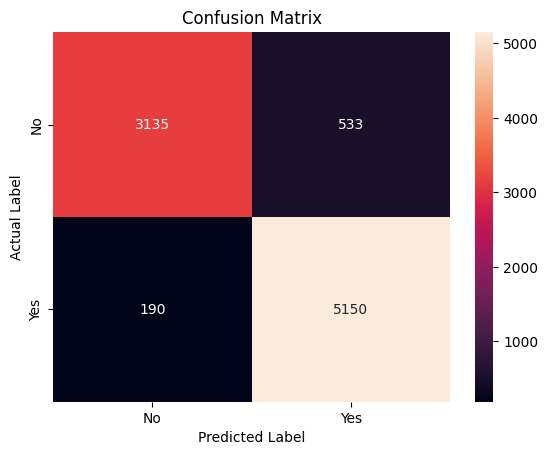

In [119]:
# plot confusion matrix to describe the performance of classifier.

cm_df=cm(y_test, y_predict)
class_label = ["No", "Yes"]
df_cm = pd.DataFrame(cm_df, index = class_label, columns = class_label)
sns.heatmap(df_cm, annot = True, fmt = "d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.show()

In [120]:
# save confusion matrix and slice into four pieces
confusion = cm(y_test, y_predict)
print(confusion)
#[row, column]
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

[[3135  533]
 [ 190 5150]]


# Metrics computed from a confusion matrix


In [121]:
# use float to perform true division, not integer division
print((TP + TN) / float(TP + TN + FP + FN))
print(ac(y_test, y_predict))

0.9197380106571936
0.9197380106571936


# Classification Error

In [122]:
classification_error = (FP + FN) / float(TP + TN + FP + FN)

print(classification_error)
print(1 - ac(y_test, y_predict))

0.0802619893428064
0.08026198934280637


In [123]:
recall = TP / float(FN + TP)

print(recall)
print(recall_score(y_test, y_predict))

0.9644194756554307
0.9644194756554307


In [124]:
specificity = TN / (TN + FP)

print(specificity)

0.8546892039258451


In [125]:
false_positive_rate = FP / float(TN + FP)

print(false_positive_rate)
print(1 - specificity)

0.14531079607415484
0.14531079607415487


In [126]:
precision = TP / float(TP + FP)

print(precision)
print(precision_score(y_test, y_predict))

0.9062115080063347
0.9062115080063347


In [127]:
f1_score = 2*((precision_score(y_test, y_predict) * recall_score(y_test, y_predict))/(precision_score(y_test, y_predict) + recall_score(y_test, y_predict)))
f1_score

0.934409870271251

# The threshold level 

In [128]:
# print the first 10 predicted probabilities of two classes- 0 and 1

y_pred_prob = model.predict_proba(x_test)[0:10]

y_pred_prob

array([[1.24155762e-06, 9.99998758e-01],
       [4.73531043e-02, 9.52646896e-01],
       [1.53242365e-07, 9.99999847e-01],
       [9.99999674e-01, 3.25855661e-07],
       [7.54151927e-01, 2.45848073e-01],
       [1.95444853e-06, 9.99998046e-01],
       [7.85099771e-01, 2.14900229e-01],
       [8.74309948e-01, 1.25690052e-01],
       [5.54276974e-06, 9.99994457e-01],
       [2.25721638e-03, 9.97742784e-01]])

In [129]:
# store the probabilities in dataframe

y_pred_prob_df = pd.DataFrame(data=y_pred_prob, columns=['Prob of - Salary <=50k (0)', 'Prob of - Salary >50k (1)'])

y_pred_prob_df

Prob of - Salary <=50k (0)  Prob of - Salary >50k (1)
0                1.241558e-06               9.999988e-01
1                4.735310e-02               9.526469e-01
2                1.532424e-07               9.999998e-01
3                9.999997e-01               3.258557e-07
4                7.541519e-01               2.458481e-01
5                1.954449e-06               9.999980e-01
6                7.850998e-01               2.149002e-01
7                8.743099e-01               1.256901e-01
8                5.542770e-06               9.999945e-01
9                2.257216e-03               9.977428e-01

Text(0, 0.5, 'Frequency')

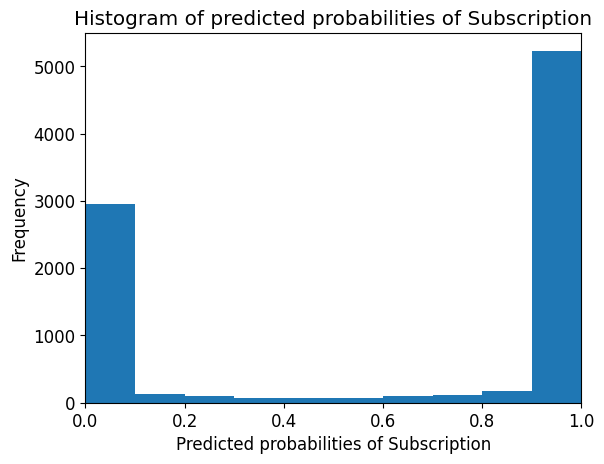

In [130]:
# store the predicted probabilities for class 1 - Probability of Subscription

y_pred1 = model.predict_proba(x_test)[:, 1]
# plot histogram of predicted probabilities


# adjust the font size 
plt.rcParams['font.size'] = 12


# plot histogram with 10 bins
plt.hist(y_pred1, bins = 10)


# set the title of predicted probabilities
plt.title('Histogram of predicted probabilities of Subscription')


# set the x-axis limit
plt.xlim(0,1)


# set the title
plt.xlabel('Predicted probabilities of Subscription')
plt.ylabel('Frequency')

# Lower the Threshold

In [131]:
from sklearn.preprocessing import binarize

for i in range(1,6):
    
    cm1=0
    
    y_pred1 = model.predict_proba(x_test)[:,1]
    
    y_pred1 = y_pred1.reshape(-1,1)
    
    y_pred2 = binarize(y_pred1, threshold=i/10)
       
    cm1 = cm(y_test, y_pred2)
        
    print ('With',i/10,'threshold the Confusion Matrix is ','\n\n',cm1,'\n\n',
           
            'with',cm1[0,0]+cm1[1,1],'correct predictions, ', '\n\n', 
           
            cm1[0,1],'Type I errors( False Positives), ','\n\n',
           
            cm1[1,0],'Type II errors( False Negatives), ','\n\n',
           
               'Accuracy score: ', (ac(y_test, y_pred2)), '\n\n',
           
               'Sensitivity: ',cm1[1,1]/(float(cm1[1,1]+cm1[1,0])), '\n\n',
           
               'Specificity: ',cm1[0,0]/(float(cm1[0,0]+cm1[0,1])),'\n\n',
          
                '====================================================', '\n\n')

With 0.1 threshold the Confusion Matrix is  

 [[2859  809]
 [  89 5251]] 

 with 8110 correct predictions,  

 809 Type I errors( False Positives),  

 89 Type II errors( False Negatives),  

 Accuracy score:  0.9003108348134992 

 Sensitivity:  0.9833333333333333 

 Specificity:  0.7794438386041439 



With 0.2 threshold the Confusion Matrix is  

 [[2966  702]
 [ 116 5224]] 

 with 8190 correct predictions,  

 702 Type I errors( False Positives),  

 116 Type II errors( False Negatives),  

 Accuracy score:  0.9091918294849023 

 Sensitivity:  0.9782771535580524 

 Specificity:  0.8086150490730644 



With 0.3 threshold the Confusion Matrix is  

 [[3043  625]
 [ 139 5201]] 

 with 8244 correct predictions,  

 625 Type I errors( False Positives),  

 139 Type II errors( False Negatives),  

 Accuracy score:  0.9151865008880995 

 Sensitivity:  0.9739700374531836 

 Specificity:  0.829607415485278 



With 0.4 threshold the Confusion Matrix is  

 [[3089  579]
 [ 160 5180]] 

 with

# ROC - AUC 

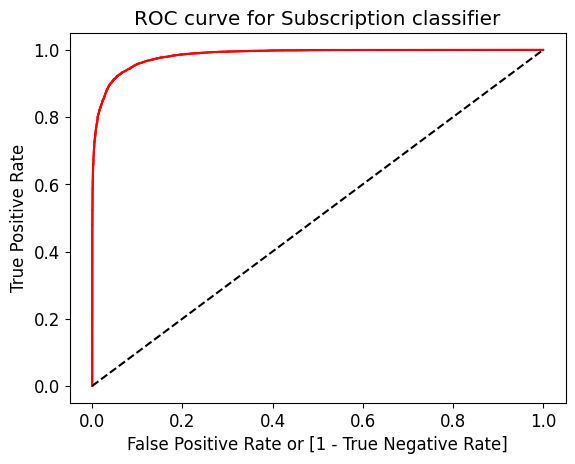

AUC-ROC Score: 0.9095543397906379


In [132]:
# ROC Curve plotting and finding AUC value
fpr,tpr,thresholds=roc_curve(y_train_smenn,model.predict_proba(x_train_smenn)[:,1])
plt.plot(fpr,tpr,color='red')
auc=roc_auc_score(y_test,y_predict)

plt.plot(fpr,tpr,color='red',label='logit model(area  = %0.2f)'%auc)
plt.plot([0,1],[0,1],'k--')
plt.title('ROC curve for Subscription classifier')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')
plt.show()

print('AUC-ROC Score:',auc)

In [133]:
from sklearn.metrics import roc_auc_score
curve = roc_auc_score(y_test, y_predict)
print(curve)

0.9095543397906379


# Classification Report

In [134]:
# print the classification report

print(report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.94      0.85      0.90      3668
           1       0.91      0.96      0.93      5340

    accuracy                           0.92      9008
   macro avg       0.92      0.91      0.92      9008
weighted avg       0.92      0.92      0.92      9008



# Predictions

In [135]:
#Predictions
y_pred = model.predict(x_train_smenn)

# Creating a datframe to with actual value and predicted value

predict = pd.DataFrame({'Actual':y_train_smenn,'Predicted':y_pred})
predict

Actual  Predicted
0           0          0
1           0          0
2           0          0
3           0          0
4           0          0
...       ...        ...
30021       1          1
30022       1          1
30023       1          1
30024       1          1
30025       1          1

[30026 rows x 2 columns]

# Hyperparameter Tuning to improve Accuracy

In [136]:
cv_method = RepeatedStratifiedKFold(n_splits=5, 
                                    n_repeats=3, 
                                    random_state=999)

gnb = GaussianNB()
from sklearn.preprocessing import PowerTransformer
params_NB = {'var_smoothing': np.logspace(0,-9, num=100)}

gs_NB = GridSearchCV(estimator=gnb, 
                     param_grid=params_NB, 
                     cv=cv_method,
                     verbose=1, 
                     scoring='accuracy')

Data_transformed = PowerTransformer().fit_transform(x_test)
gs_NB.fit(Data_transformed, y_test)

Fitting 15 folds for each of 100 candidates, totalling 1500 fits


GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=5, random_state=999),
             estimator=GaussianNB(),
             param_grid={'var_smoothing': array([1.00000000e+00, 8.11130831e-01, 6.57933225e-01, 5.33669923e-01,
       4.32876128e-01, 3.51119173e-01, 2.84803587e-01, 2.31012970e-01,
       1.87381742e-01, 1.51991108e-01, 1.23284674e-01, 1.00000000e-01,
       8.11130831e-02, 6.57933225e-02, 5...
       1.23284674e-07, 1.00000000e-07, 8.11130831e-08, 6.57933225e-08,
       5.33669923e-08, 4.32876128e-08, 3.51119173e-08, 2.84803587e-08,
       2.31012970e-08, 1.87381742e-08, 1.51991108e-08, 1.23284674e-08,
       1.00000000e-08, 8.11130831e-09, 6.57933225e-09, 5.33669923e-09,
       4.32876128e-09, 3.51119173e-09, 2.84803587e-09, 2.31012970e-09,
       1.87381742e-09, 1.51991108e-09, 1.23284674e-09, 1.00000000e-09])},
             scoring='accuracy', verbose=1)

In [137]:
gs_NB.best_params_

{'var_smoothing': 0.533669923120631}

In [138]:
gs_NB.best_score_

0.8621597776382298

In [139]:
results_NB = pd.DataFrame(gs_NB.cv_results_['params'])
results_NB['test_score'] = gs_NB.cv_results_['mean_test_score']

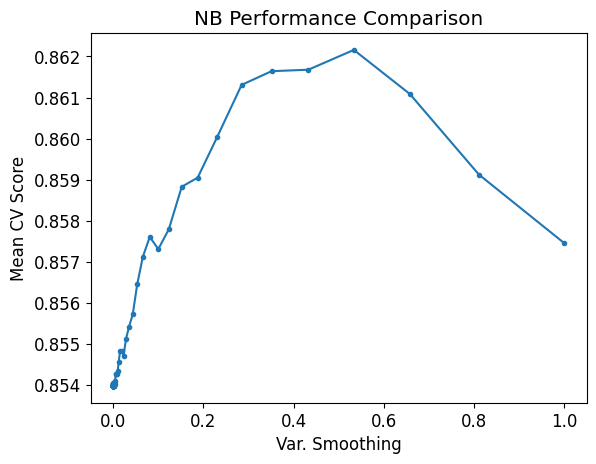

In [140]:
plt.plot(results_NB['var_smoothing'], results_NB['test_score'], marker = '.')    
plt.xlabel('Var. Smoothing')
plt.ylabel("Mean CV Score")
plt.title("NB Performance Comparison")
plt.show()

In [141]:
# predict the target on the test dataset
predict_test = gs_NB.predict(Data_transformed)

# Accuracy Score on test dataset
accuracy_test = accuracy_score(y_test,predict_test)
print('accuracy_score on test dataset : ', accuracy_test)

accuracy_score on test dataset :  0.8625666074600356


Text(0.5, 1.0, 'Test Data')

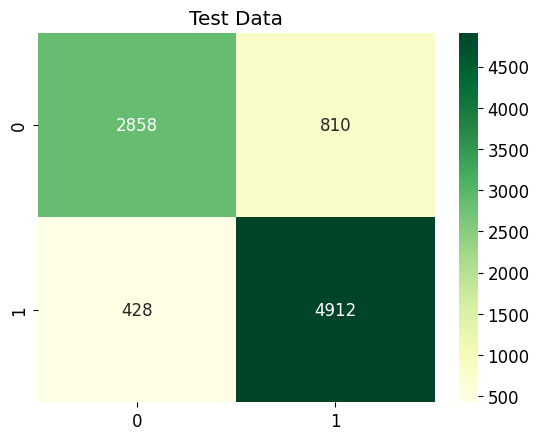

In [142]:
sns.heatmap((confusion_matrix(y_test,predict_test)),annot=True,fmt='.5g',cmap="YlGn").set_title('Test Data')

In [143]:
# print the classification report

print(report(y_test, predict_test))

              precision    recall  f1-score   support

           0       0.87      0.78      0.82      3668
           1       0.86      0.92      0.89      5340

    accuracy                           0.86      9008
   macro avg       0.86      0.85      0.86      9008
weighted avg       0.86      0.86      0.86      9008

